Hello Brandon!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

## Goal

Build a regression model to predict the following targets:

- rougher concentrate recovery rougher.output.recovery
- final concentrate recovery final.output.recovery

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator, DayLocator, HourLocator

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import make_scorer

import warnings
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
pd.set_option('MAX_ROWS', None)
pd.set_option('MAX_COLUMNS', None)

# Load and Analyse Dataset

In [6]:
full_df = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=['date'], date_parser=pd.to_datetime)
train_df = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=['date'], date_parser=pd.to_datetime).reset_index(drop=True)
test_df = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=['date'], date_parser=pd.to_datetime).reset_index(drop=True)

In [7]:
full_df.shape, train_df.shape, test_df.shape

((22716, 87), (16860, 87), (5856, 53))

In [8]:
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

In [10]:
full_df.isnull().sum().sort_values(ascending=False)[:10]

rougher.output.recovery               3119
rougher.output.tail_ag                2737
rougher.output.tail_au                2736
rougher.output.tail_sol               2736
rougher.input.floatbank11_xanthate    2257
secondary_cleaner.output.tail_sol     2215
final.output.recovery                 1963
rougher.calculation.au_pb_ratio       1627
primary_cleaner.input.sulfate         1609
primary_cleaner.input.depressant      1546
dtype: int64

In [11]:
full_df.duplicated().sum()

0

In [12]:
full_df['date'].duplicated().sum()

0

In [13]:
full_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

In [14]:
full_df['date'].min(), full_df['date'].max()

(Timestamp('2016-01-15 00:00:00'), Timestamp('2018-08-18 10:59:59'))

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

In [16]:
train_df.isnull().sum().sort_values(ascending=False)[:10]

rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64

In [17]:
train_df.duplicated().sum()

0

In [18]:
train_df['date'].duplicated().sum()

0

In [19]:
train_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

In [20]:
train_df['date'].min(), train_df['date'].max()

(Timestamp('2016-01-15 00:00:00'), Timestamp('2018-08-18 10:59:59'))

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

test dataset seems to have different number of columns

In [22]:
full_df.columns.difference(test_df.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Columns that is not in test datasets

In [23]:
train_df.isnull().sum().sort_values(ascending=False)[:10]

rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64

In [24]:
test_df.duplicated().sum()

0

In [25]:
test_df['date'].duplicated().sum()

0

In [26]:
test_df.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

In [27]:
test_df['date'].min(), test_df['date'].max()

(Timestamp('2016-09-01 00:59:59'), Timestamp('2017-12-31 23:59:59'))

**Overall**

The data is recorded hourly from the period of 2016-01-15 midnight to 2018-08-18 11 AM; the train set is from the same period as the full dataset, and the test set is from 2016-09-01 to 2017-12-31 midnight - overlapping periods.

22716 rows in the full dataset, and each row measures details about the Gold extraction process on a given day.

The train set is about 75% of the full dataset, and the test set makes up the rest of it.

There are 4 stages: rougher, which is the start of the process; this stage is further broken into the following: input, output, state, and calculation. The next stage is primary_cleaner, and it is broken down into:input, output, and state. The third stage in the process is: secondary_cleaner, and this is broken down into: output and state. Finally, we have the final stage, which is divided into: output. Each of these intermediate sub stages has its own measurements of that stages process.

There are missing values. Some of the prominent ones are: rougher.output.recovery, rougher.output.tail_ag, and rougher.output.tail_sol.

There are no duplicates in the full dataset.

In the numerical summary there are 0 values in the final output stages. 

The fluid level fields have negative values and range widely.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Wow! Great initial review.
</div>

# Prepare and Analyze Dataset

In [28]:
#deal with missing values in the target variables
#dropping them as we can't interpret the missing values
train_df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [29]:
#dropping both targets that is equals to 0
train_df.drop(train_df[(train_df['rougher.output.recovery'] == 0) & (train_df['final.output.recovery'] == 0)].index, inplace=True)

In [30]:
#add missing dataset to test_df
cols_missing = full_df.columns.difference(test_df.columns).tolist()
cols_missing = ['date'] + cols_missing

In [31]:
test_df = full_df[cols_missing].merge(test_df, how='inner', left_on=['date'], 
                           right_on=['date'])

In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                5856 non-null   datetime64[ns]
 1   final.output.concentrate_ag                         5839 non-null   float64       
 2   final.output.concentrate_au                         5841 non-null   float64       
 3   final.output.concentrate_pb                         5841 non-null   float64       
 4   final.output.concentrate_sol                        5841 non-null   float64       
 5   final.output.recovery                               5414 non-null   float64       
 6   final.output.tail_ag                                5839 non-null   float64       
 7   final.output.tail_au                                5841 non-null   float64       
 8   final.ou

In [33]:
# replace missing values using interpolation
train_df.interpolate(inplace=True)
test_df.interpolate(inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

Since we are dealing with time-series data with hourly intervals, using the interpolate method able to introduce variability to the dataset.

In [34]:
train_df.isnull().sum().sum()

0

In [35]:
test_df.isnull().sum().sum()

0

In [36]:
# calculate recovery
def recovery(C, F, T):
    R = 100 * C*(F-T)/(F*(C-T))
    return R

In [37]:
def check_recovery(target, C, F, T):
    return mean_absolute_error(target, recovery(C, F, T))

In [38]:
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']
target = train_df['rougher.output.recovery']
print('Calculated Recovery versus target is {}'.format(check_recovery(target, C, F, T)))

Calculated Recovery versus target is 1.1124704650708212e-14


The MAE is small, close to 0. So, we can conclude the calculated Recovery is correct.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

In [39]:
#create features
def create_date_features(df, feature='date', time_list=[]):
    for param in time_list:
        df[param] = getattr(df[feature].dt, param)

In [40]:
date_feats = ['year', 'month', 'day', 'dayofweek', 'hour']
create_date_features(train_df, time_list=date_feats)

In [41]:
create_date_features(test_df, date_feats)

In [42]:
train_df.shape, test_df.shape

((14148, 92), (5856, 87))

In [43]:
#plot for time serires
def plot_time_series(df, dt='date', date_range=None, var=None, locator=MonthLocator(), dateformater='%Y-%b', ylabel=None, title=None, figsize=(12, 7)):
    fig, ax = plt.subplots()
    if not date_range:
        df.plot(dt, var, figsize=figsize, title=title, ax=ax)
    else:
        lb, ub = date_range
        mask = (df[dt] > lb) & (df[dt] < ub)
        df[mask].plot(dt, var, figsize=figsize, title=title, ax=ax)
    ax.yaxis.set_label(ylabel)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(DateFormatter(dateformater))

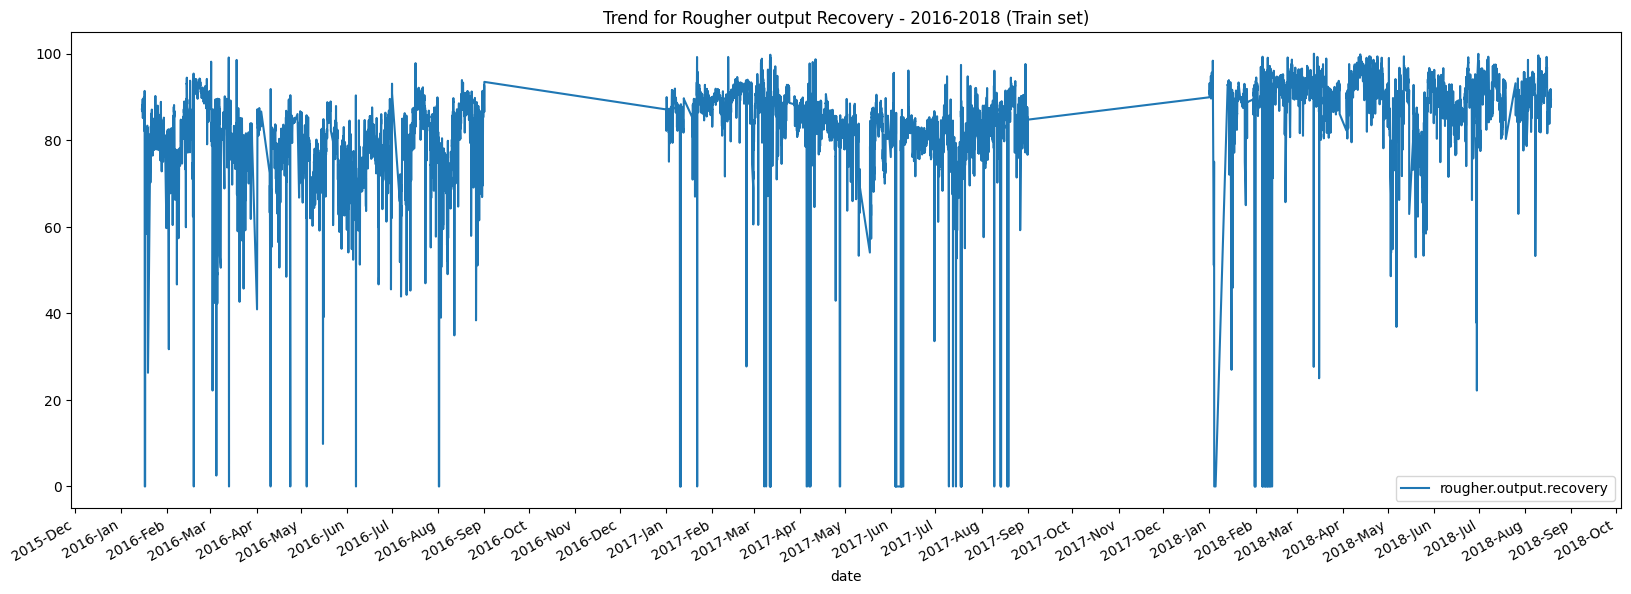

In [44]:
plot_time_series(
                    train_df, 
                    dt='date', 
                    date_range=None, 
                    var='rougher.output.recovery', 
                    locator=MonthLocator(), 
                    dateformater='%Y-%b',
                    ylabel='Rougher output recovery',
                    title='Trend for Rougher output Recovery - 2016-2018 (Train set)',
                    figsize=(20, 7)
                )

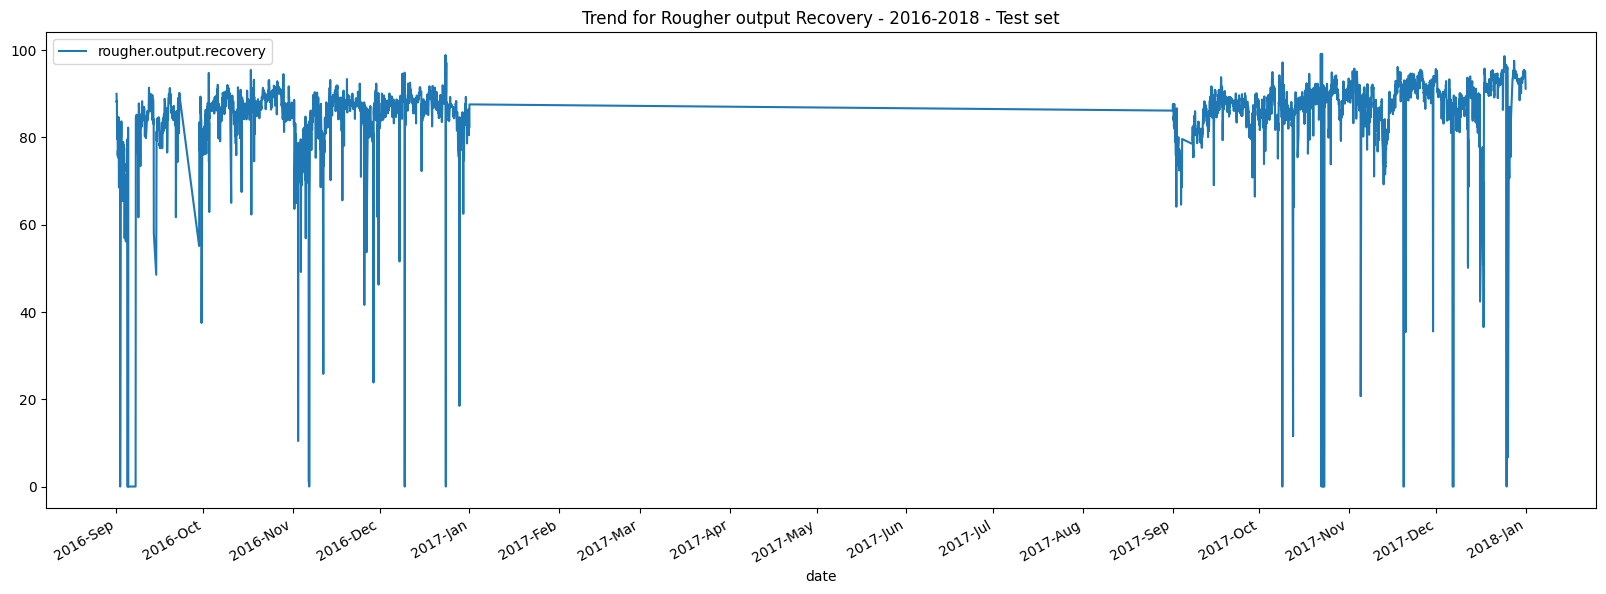

In [45]:
plot_time_series(
                    test_df, 
                    dt='date', 
                    date_range=None, 
                    var='rougher.output.recovery', 
                    locator=MonthLocator(), 
                    dateformater='%Y-%b',
                    ylabel='Rougher output recovery',
                    title='Trend for Rougher output Recovery - 2016-2018 - Test set',
                    figsize=(20, 7)
                )

The distribution of the time-series plots for both the train and test sets look similar; the gaps represented by flat lines is where the data was split between train and test sets. The first 8 months went into the train set, and the remaining 4 months into the test set in that year of overlap.

There are several periods, where the rougher.output.recovery has 0 output. There could be an issue with the data collection or there could have been a production issue.

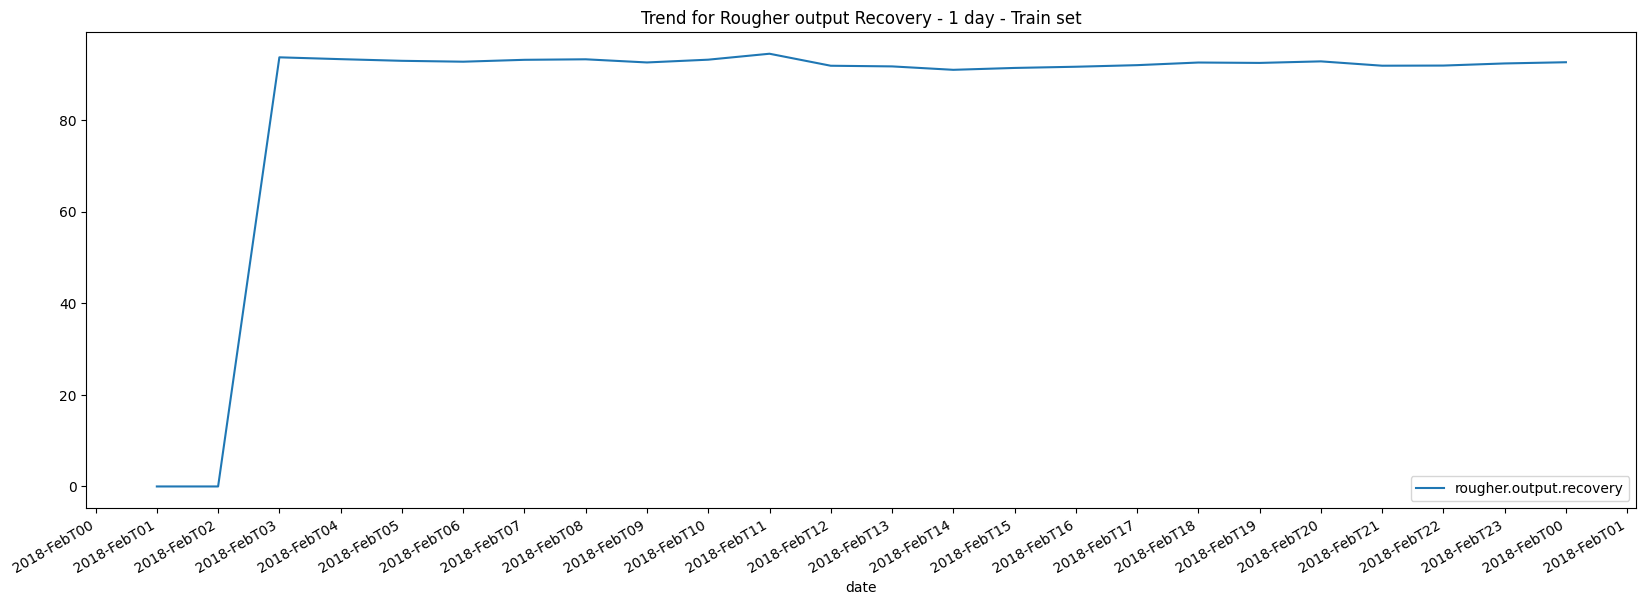

In [46]:
plot_time_series(
                    train_df, 
                    dt='date', 
                    date_range=['2018-02-01', '2018-02-02'], 
                    var='rougher.output.recovery', 
                    locator=HourLocator(), 
                    dateformater='%Y-%bT%H',
                    ylabel='Rougher output recovery',
                    title='Trend for Rougher output Recovery - 1 day - Train set',
                    figsize=(20, 7)
                )

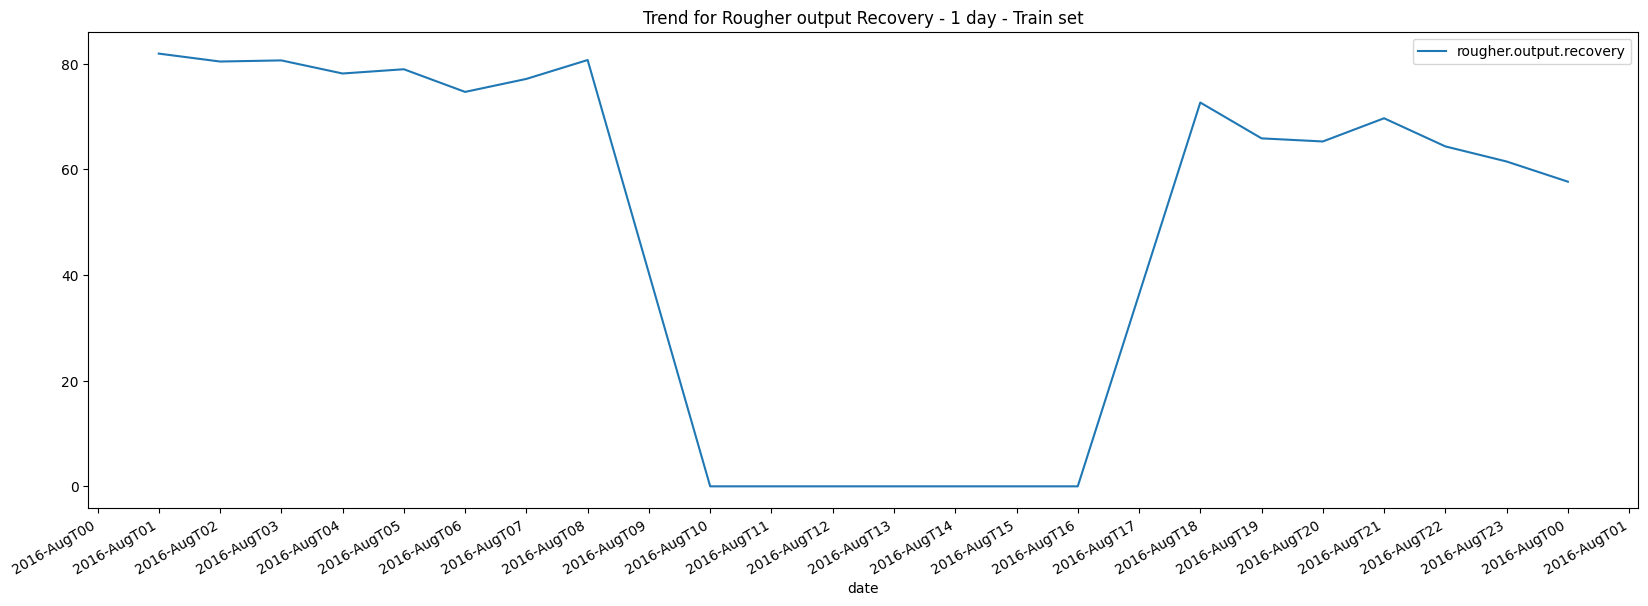

In [47]:
plot_time_series(
                    train_df, 
                    dt='date', 
                    date_range=['2016-08-01', '2016-08-02'], 
                    var='rougher.output.recovery', 
                    locator=HourLocator(), 
                    dateformater='%Y-%bT%H',
                    ylabel='Rougher output recovery',
                    title='Trend for Rougher output Recovery - 1 day - Train set',
                    figsize=(20, 7)
                )

In the first 1 day plot, there is no data for the first 2 hours, and then it peaks arpund 80, and stays there for the rest of the day in Feb 2018.

In the second chart, it starts around 80, and is more or less consistent till 8AM, and then drops to 0 by 10 AM, remains there for the next 6 hours before picking up again.

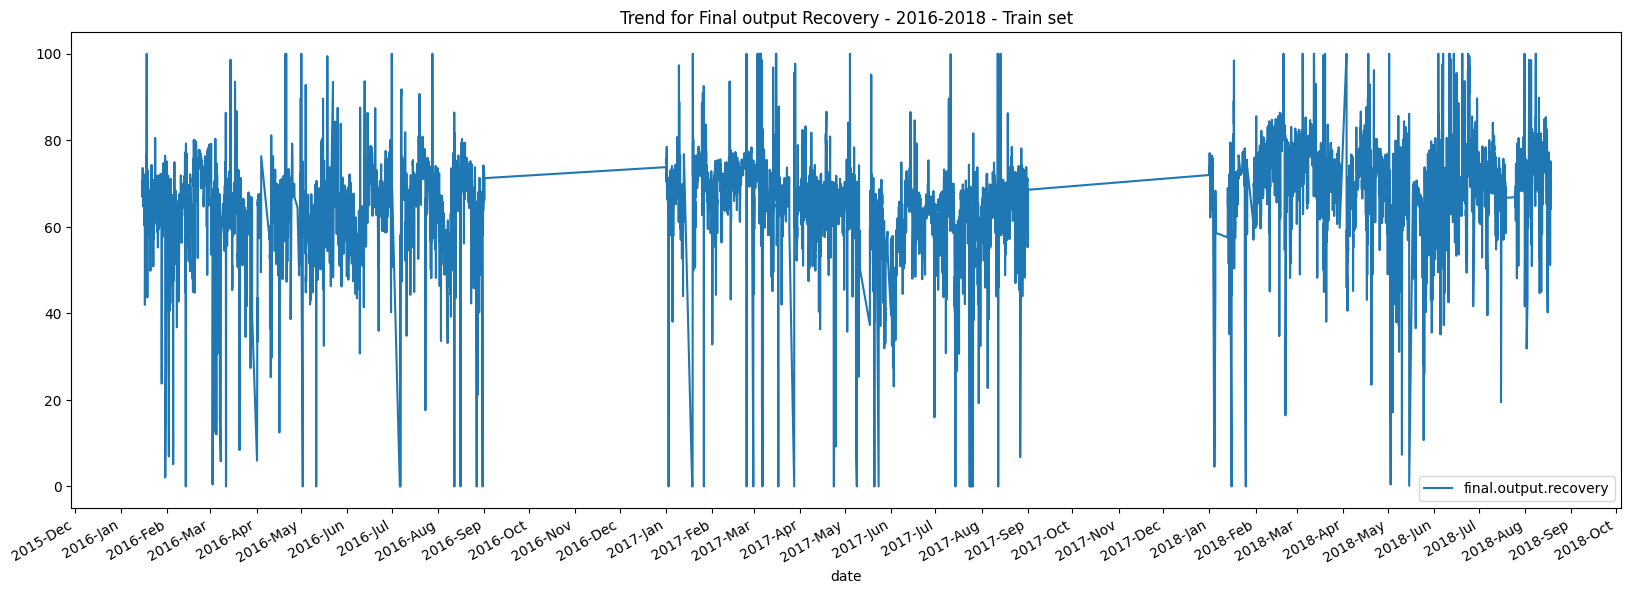

In [48]:
plot_time_series(
                    train_df, 
                    dt='date', 
                    date_range=None, 
                    var='final.output.recovery', 
                    locator=MonthLocator(), 
                    dateformater='%Y-%b',
                    ylabel='Final output recovery',
                    title='Trend for Final output Recovery - 2016-2018 - Train set',
                    figsize=(20, 7)
                )

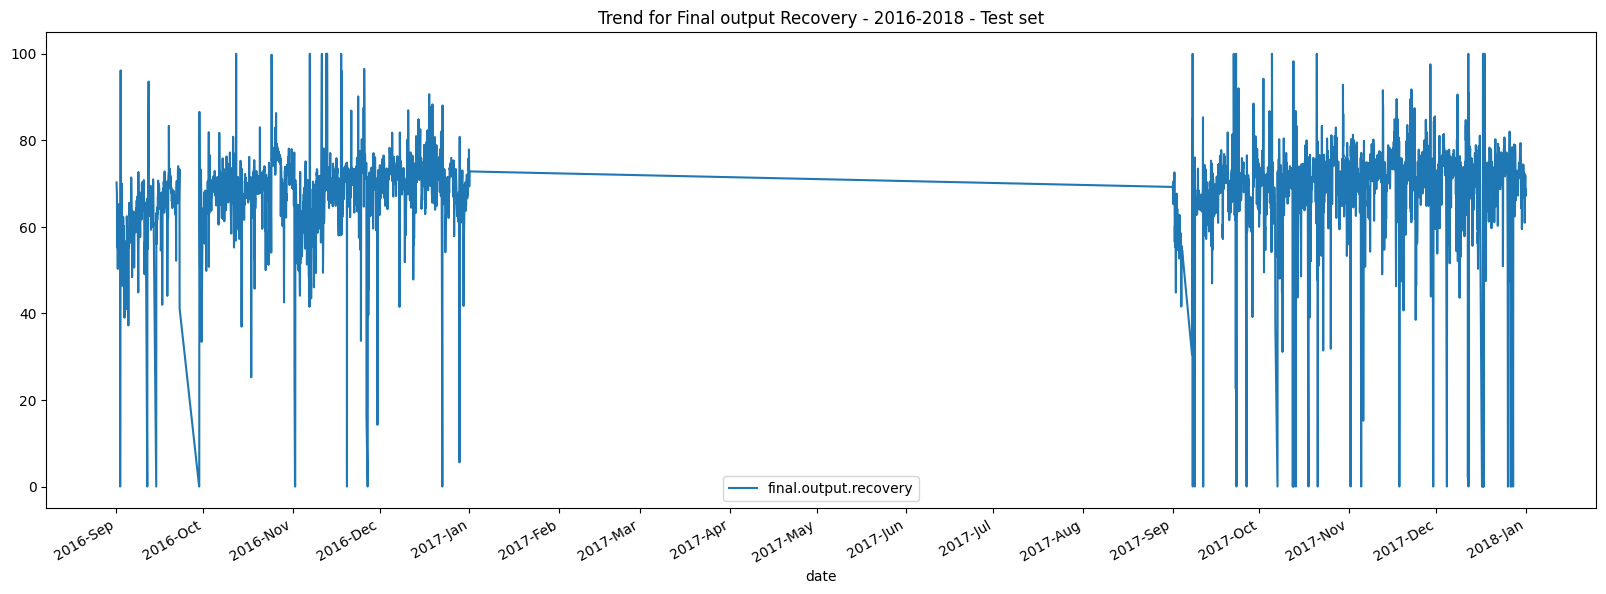

In [49]:
plot_time_series(
                    test_df, 
                    dt='date', 
                    date_range=None, 
                    var='final.output.recovery', 
                    locator=MonthLocator(), 
                    dateformater='%Y-%b',
                    ylabel='Final output recovery',
                    title='Trend for Final output Recovery - 2016-2018 - Test set',
                    figsize=(20, 7)
                )

The plots for the final.output.recovery follows a similar pattern to rougher.output.recovery, although there are more fluctuations, and 0 values during a given day.

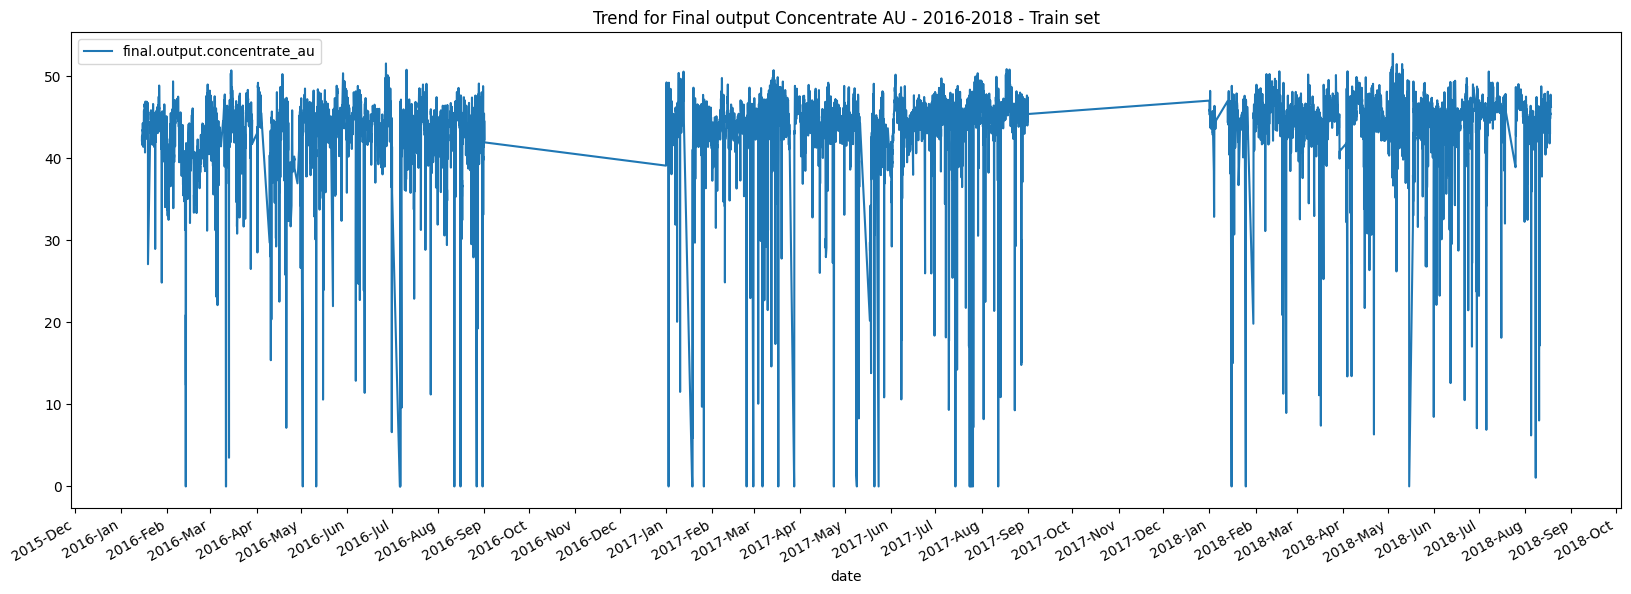

In [50]:
plot_time_series(
                    train_df, 
                    dt='date', 
                    date_range=None, 
                    var='final.output.concentrate_au', 
                    locator=MonthLocator(), 
                    dateformater='%Y-%b',
                    ylabel='Final output recovery',
                    title='Trend for Final output Concentrate AU - 2016-2018 - Train set',
                    figsize=(20, 7)
                )

### concentrations of each metals on the purification stage

In [51]:
stages = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
metals = ['au', 'ag', 'pb']
stage_metal_pairs = [(stage, metal) for metal in metals for stage in stages]

In [52]:
def remove_outliers(df, field):
    Q1 = df[field].sum(axis=1).quantile(0.25)
    Q3 = df[field].sum(axis=1).quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    return df[(df[field].sum(axis=1) > lb) &  (df[field].sum(axis=1) < ub)][field]

In [53]:
def plot_metal_concentrations(df, var_pairs, bins=30, 
                              title=None, xlabel=None, 
                              legends=[],
                              r=1, c=1,
                              remove_outlier = False,
                              figsize=(9, 7)):
    """
    Plot Histograms of the concentration of metals at different stages
    of purification
    """
    if not remove_outlier:
        if r == 1 and c == 1:
            for i in range(0, len(var_pairs), 3):
                fig, ax = plt.subplots()
                for legend, var_pair in zip(legends, var_pairs[i: i+3]):
                    var = var_pair[0] + var_pair[1]
                    df[var].plot(kind='hist', bins=bins, ax=ax, label=legend, 
                                 alpha=0.5,
                                 figsize=figsize)
                ax.set_title(title + ' ' + var_pair[1])
                ax.set_xlabel(var_pair[1] + ' ' + xlabel)
                ax.axes.legend()
        else:
            fig, ax = plt.subplots(r, c)
            for i in range(len(ax.flatten())):
                df[var_pairs[i]].sum(axis=1).plot(kind='hist', bins=bins, ax=ax[i], 
                                                 label=legends[i],
                                                 alpha=0.5,
                                                 figsize=figsize)
                metal = var_pairs[i][-1].split('_')[-1]
                ax[i].set_title(title + ' ' + metal)
                ax[i].set_xlabel('Total concentration - ' + metal + ' ' + xlabel)
    else:
        fig, ax = plt.subplots(r, c)
        for i in range(len(ax.flatten())):
            res = remove_outliers(df, var_pairs[i])
            res.sum(axis=1).plot(kind='hist', bins=bins, ax=ax[i], 
                                                 label=legends[i],
                                                 alpha=0.5,
                                                 figsize=figsize)
            metal = var_pairs[i][-1].split('_')[-1]
            ax[i].set_title(title + ' ' + metal)
            ax[i].set_xlabel('Total concentration - ' + metal + ' ' + xlabel)
    plt.tight_layout()

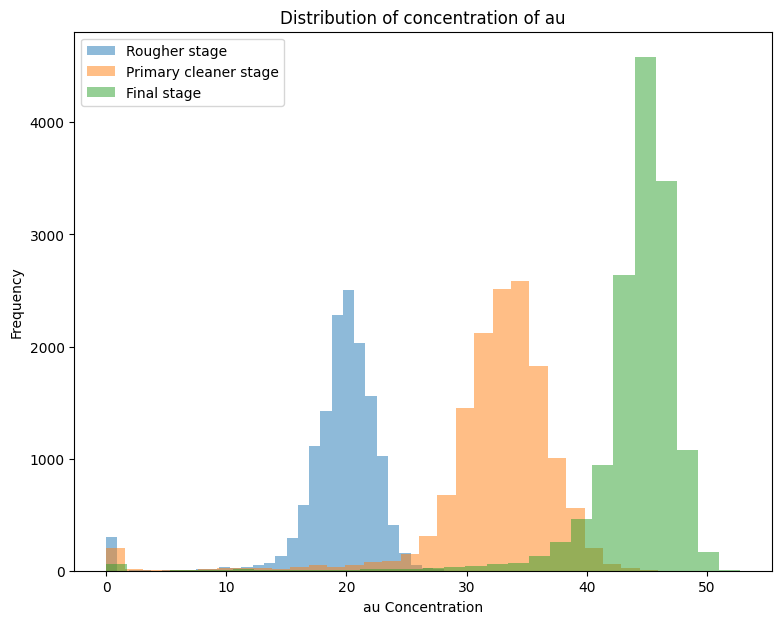

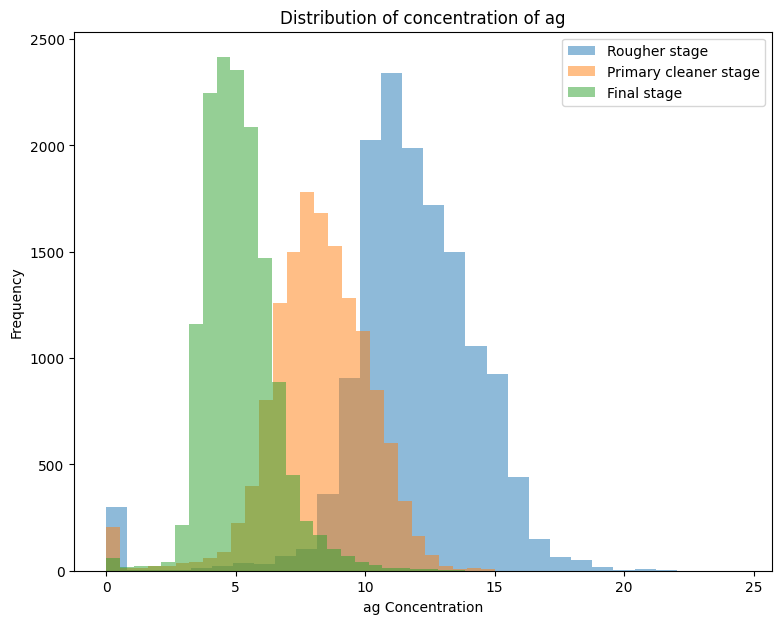

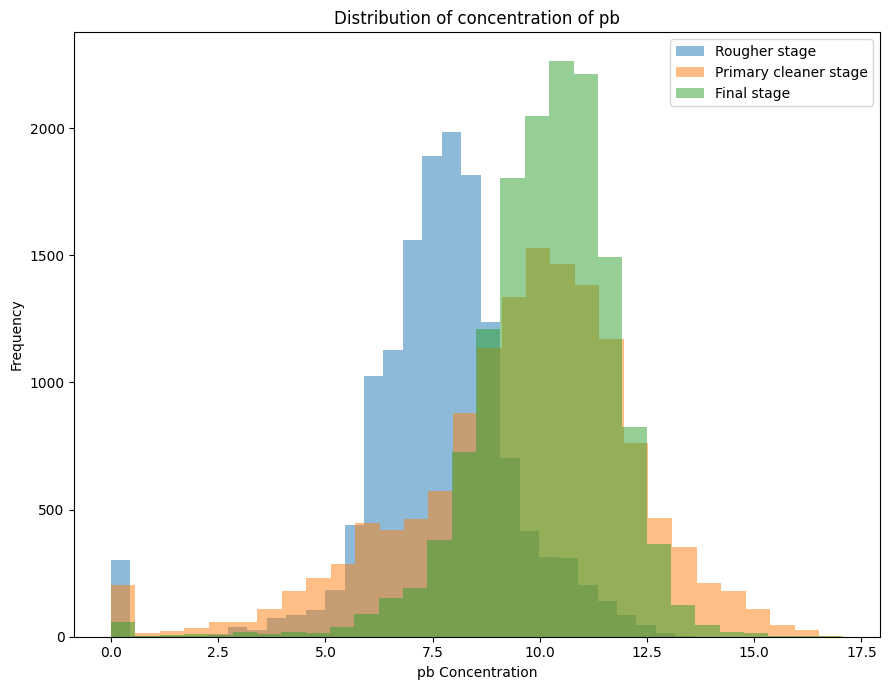

In [54]:
plot_metal_concentrations(
                            train_df, 
                            stage_metal_pairs, 
                            bins=30, 
                            title='Distribution of concentration of', xlabel='Concentration', 
                            legends=['Rougher stage', 'Primary cleaner stage', 'Final stage'],
                            figsize=(9, 7)
                         )

The mean concentration of Gold increases with each stage in the purification process. However, for Silver, the mean concentration decreases with each stage. Lead shows a similar trend, however, there is a lot of overlap in the mean concentration at each stage, which is not so prominent for Gold.

In [55]:
train_input_size = pd.concat([pd.Series(['Train'] * len(train_df)), train_df['rougher.input.feed_size'].reset_index(drop=True)], axis=1)
test_input_size = pd.concat([pd.Series(['Test'] * len(train_df)), test_df['rougher.input.feed_size'].reset_index(drop=True)], axis=1)
rougher_input_feed_sizes = pd.concat([train_input_size, test_input_size], axis=0).reset_index(drop=True)
rougher_input_feed_sizes.columns = ['sample', 'rougher_input_feed_size']

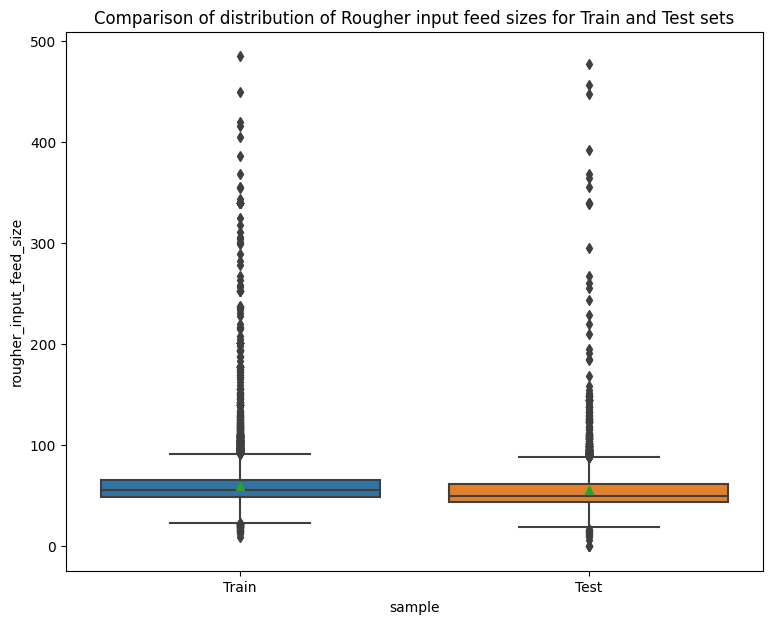

In [56]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(x='sample', y='rougher_input_feed_size', showmeans=True, data=rougher_input_feed_sizes, ax=ax)
plt.title('Comparison of distribution of Rougher input feed sizes for Train and Test sets')
plt.show()

In [57]:
train_df['rougher.input.feed_size'].mean()

60.10025478155076

In [58]:
train_df['rougher.input.feed_size'].median()

55.269823536270806

In [59]:
test_df['rougher.input.feed_size'].mean()

55.88679974688635

In [60]:
test_df['rougher.input.feed_size'].median()

49.964795720399515

The medians and means of the sample distributions are quite similar. However, at both extremes, there are outliers.

### the total concentrations of all substances at different stages

In [61]:
# prepare the input metal stage pairs
stages = ['rougher.input.feed_', 'rougher.output.concentrate_', 'final.output.concentrate_']
stage_sub_pairs = []
for metal in metals:
    tmp = []
    for stage in stages:
        tmp.append(stage + metal)
    stage_sub_pairs.append(tmp)   

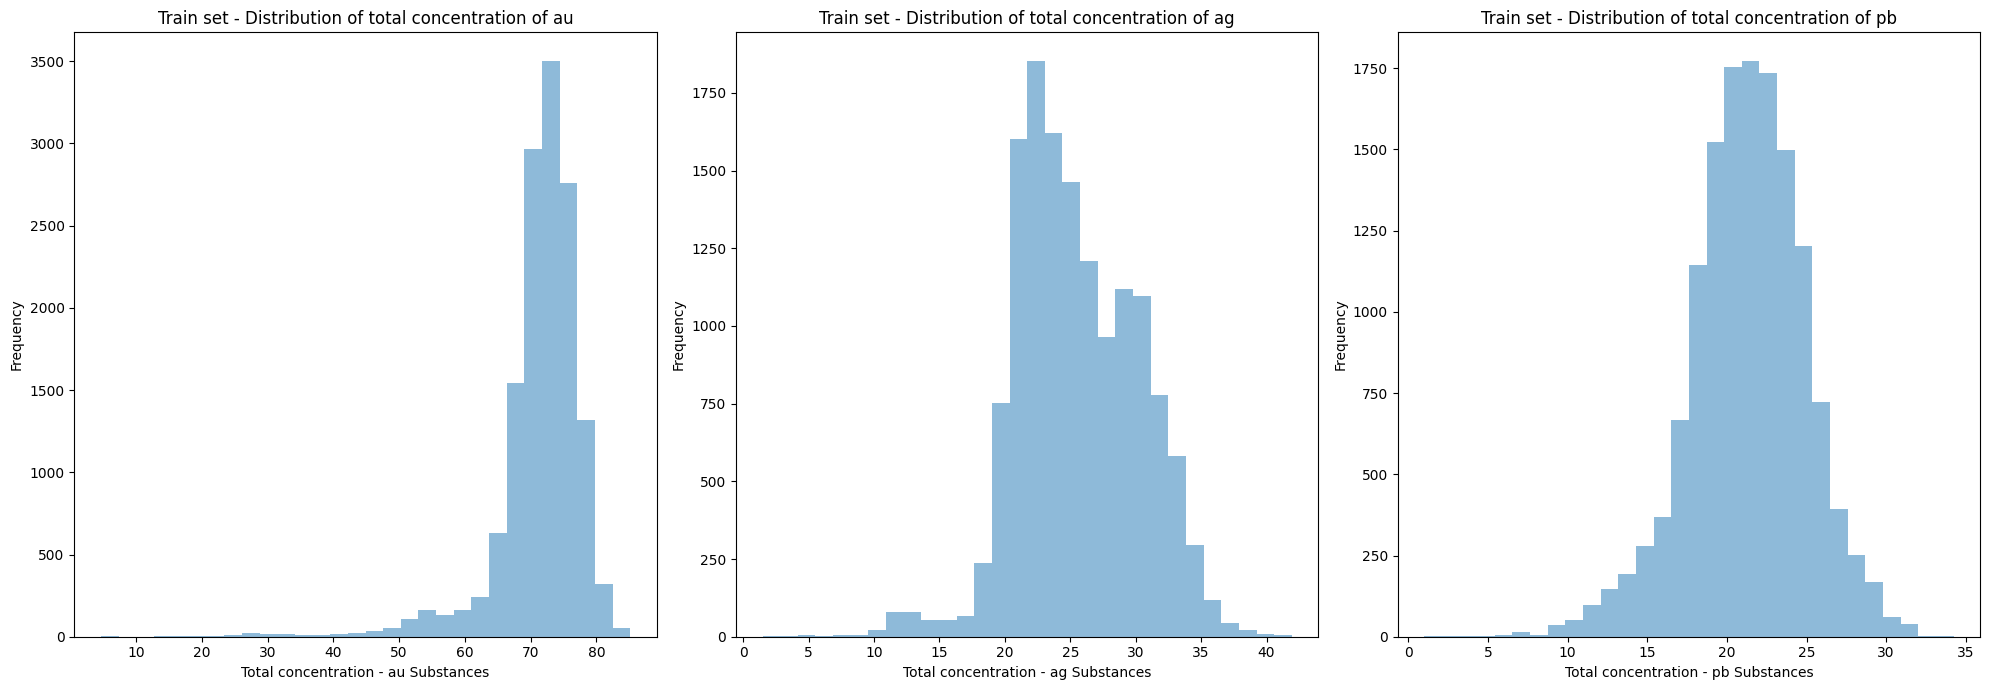

In [62]:
plot_metal_concentrations(
                            train_df, 
                            stage_sub_pairs, 
                            bins=30, 
                            title='Train set - Distribution of total concentration of', xlabel='Substances', 
                            legends=['Rougher feed input', 'Rougheroutput concentrate', 'Final output concentrate'],
                            figsize=(20, 7),
                            r=1,
                            c=3
                         )

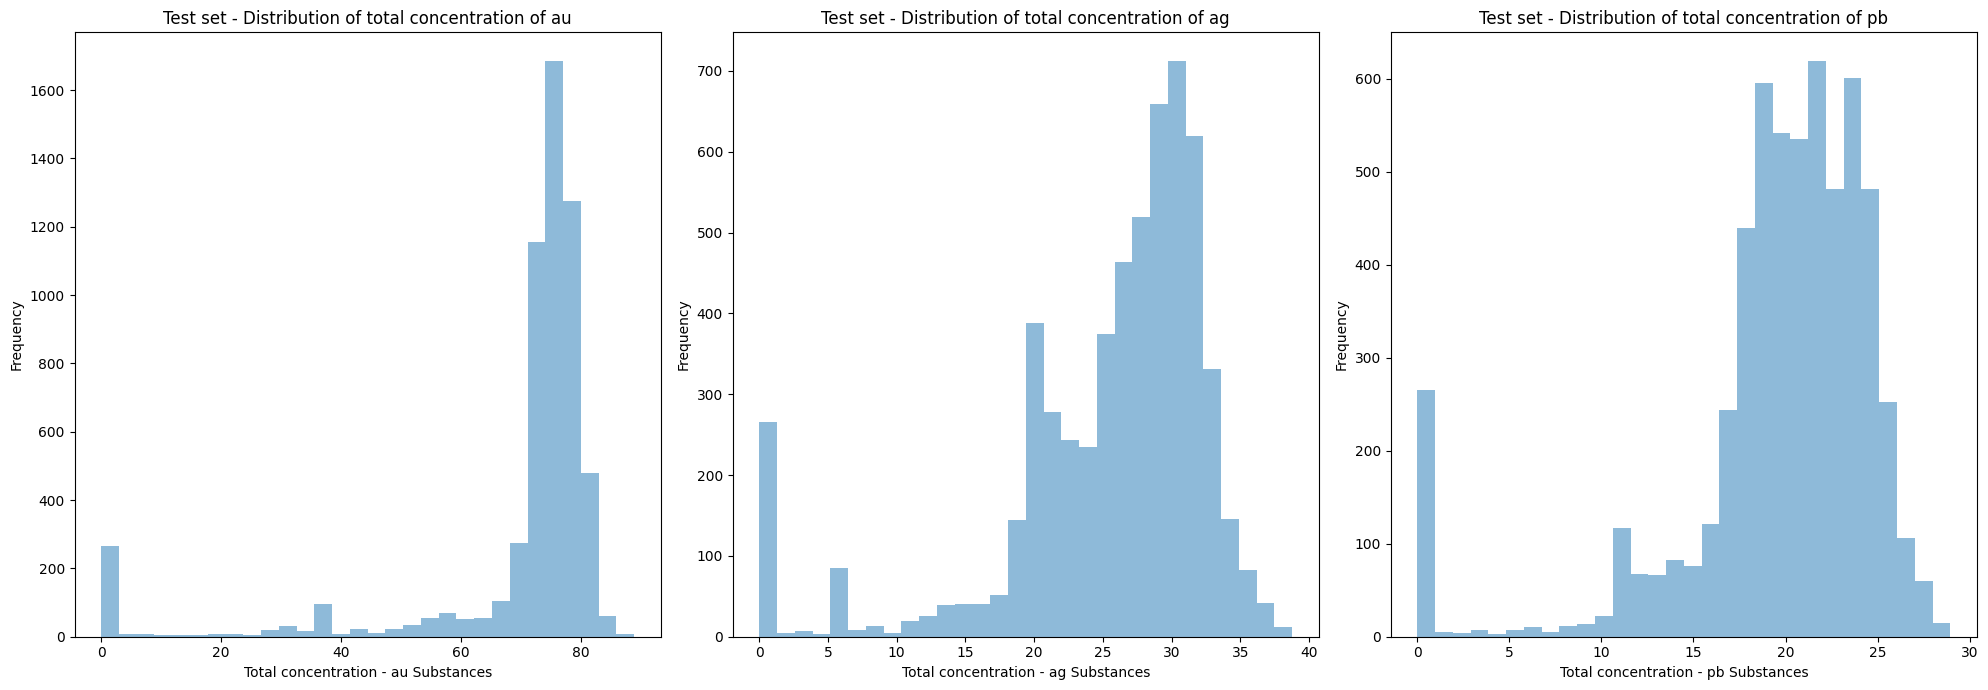

In [63]:
plot_metal_concentrations(
                            test_df, 
                            stage_sub_pairs, 
                            bins=30, 
                            title='Test set - Distribution of total concentration of', xlabel='Substances', 
                            legends=['Rougher feed input', 'Rougheroutput concentrate', 'Final output concentrate'],
                            figsize=(20, 7),
                            r=1, 
                            c=3
                         )

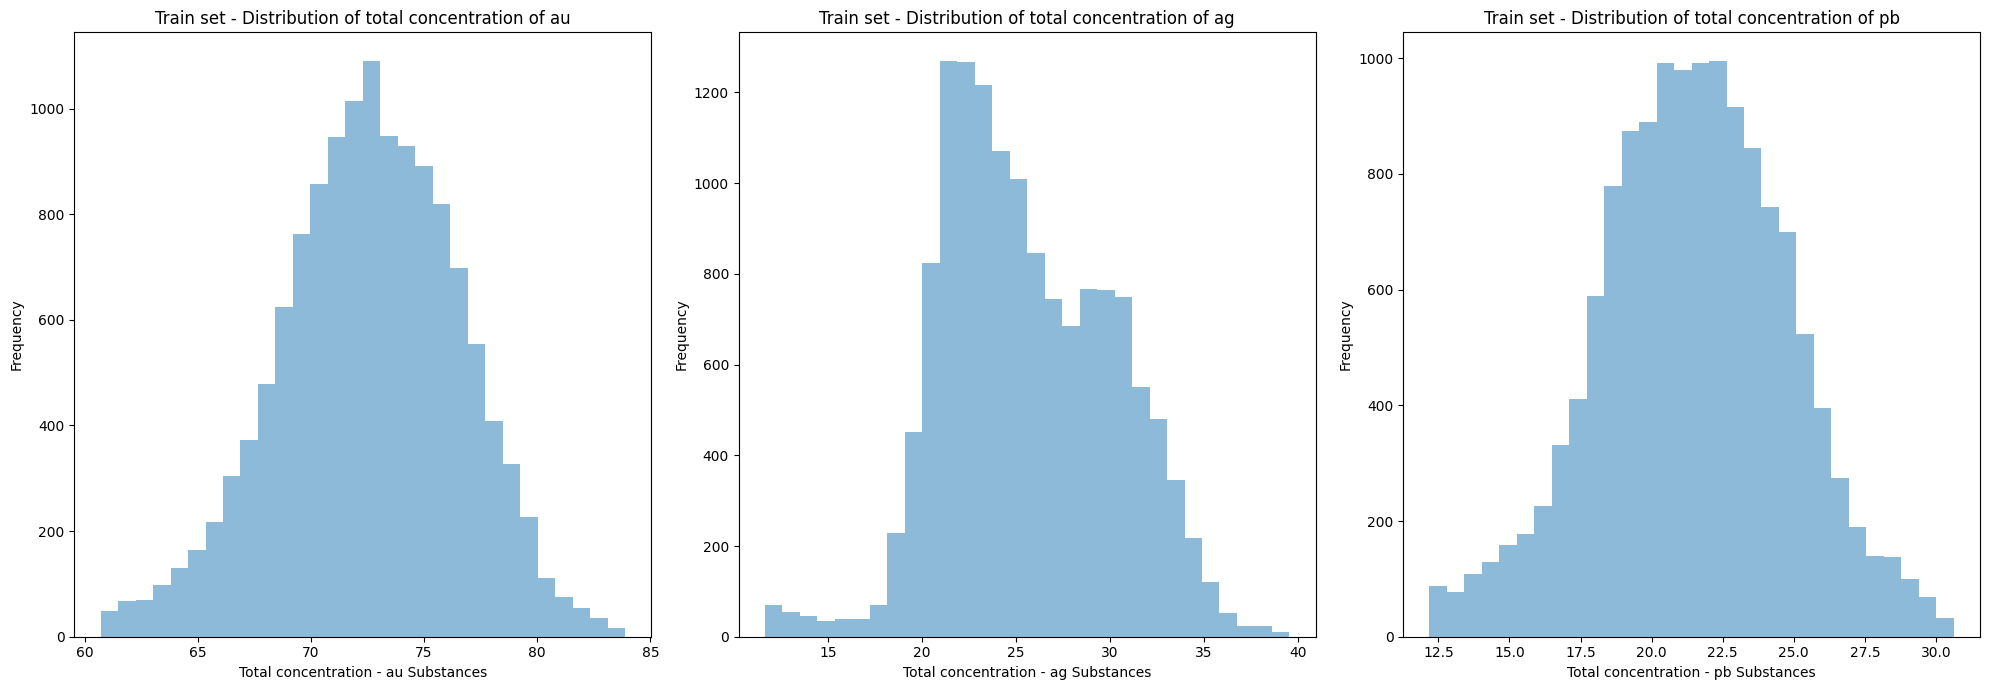

In [64]:
plot_metal_concentrations(
                            train_df, 
                            stage_sub_pairs, 
                            bins=30, 
                            title='Train set - Distribution of total concentration of', xlabel='Substances', 
                            legends=['Rougher feed input', 'Rougheroutput concentrate', 'Final output concentrate'],
                            figsize=(20, 7),
                            r=1, 
                            c=3,
                            remove_outlier=True
                         )

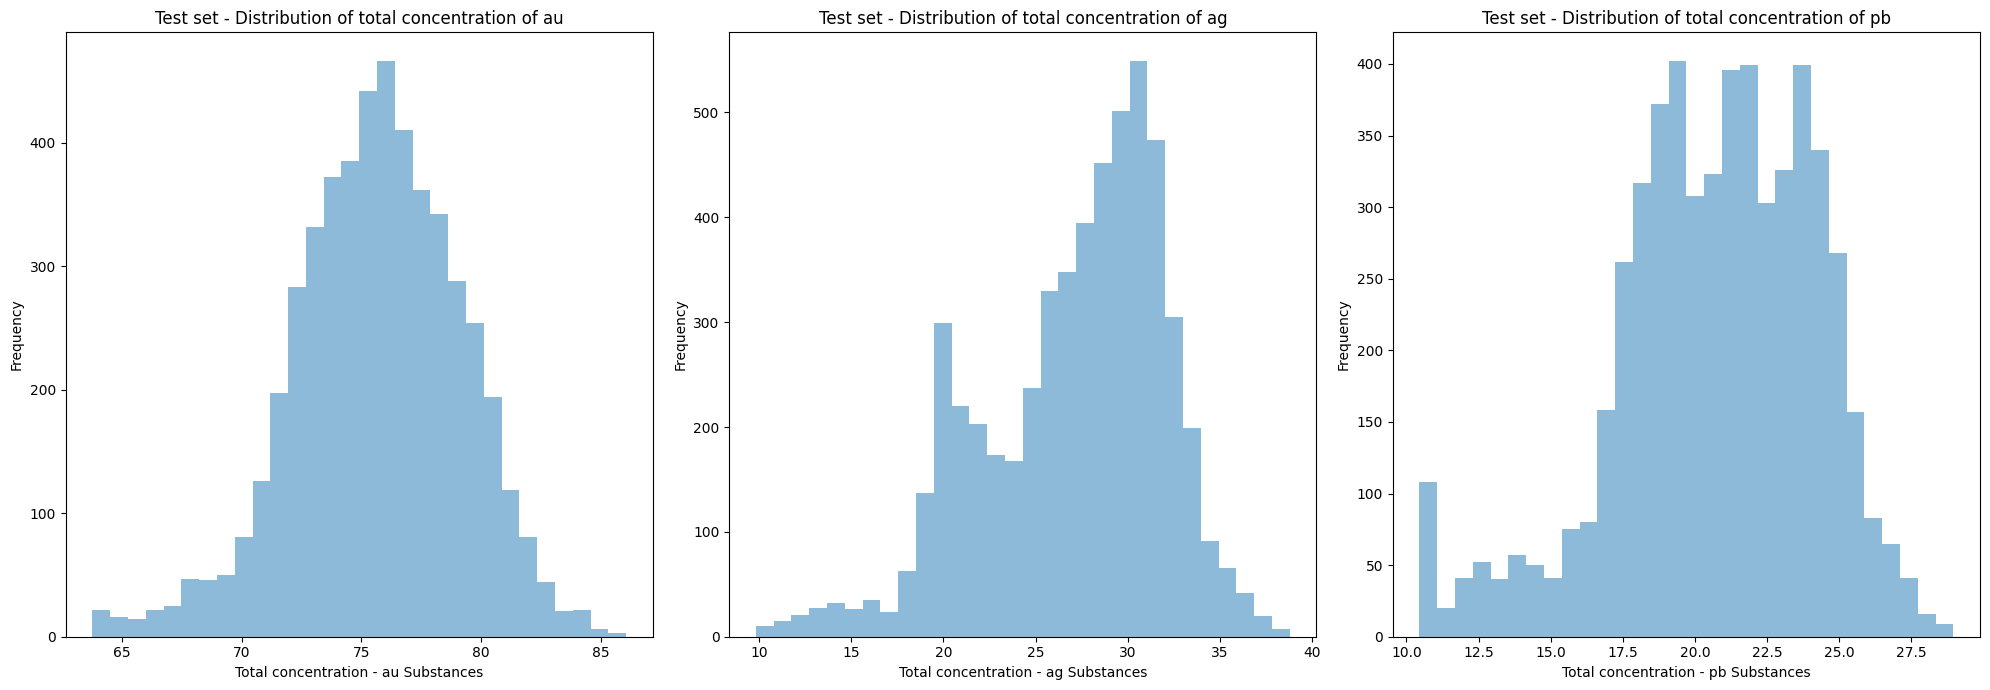

In [65]:
plot_metal_concentrations(
                            test_df, 
                            stage_sub_pairs, 
                            bins=30, 
                            title='Test set - Distribution of total concentration of', xlabel='Substances', 
                            legends=['Rougher feed input', 'Rougheroutput concentrate', 'Final output concentrate'],
                            figsize=(20, 7),
                            r=1, 
                            c=3,
                            remove_outlier=True
                         )

With the removal of the outliers, the distribution for total concetrations of Gold appears almost Normal. 

The distributions for Silver nd Lead, however have multiple peaks; this is possibly due to appearance of 0 values in the final.output.concentrate and rougher.output.concentrate features. 

This can be solve by applying the outlier removal to individual features before aggregating them.

In [66]:
# Heatmap for concentrates with target
def plot_heatmaps(df, feature, title=None, figsize=(7, 7)):
    plt.figure(figsize=(20, 20))
    cols = [col for col in df.columns if feature in col or 'recovery' in col]
    sns.heatmap(df[cols].corr(), annot=True, cmap="RdYlGn")
    plt.title(title)
    plt.show()

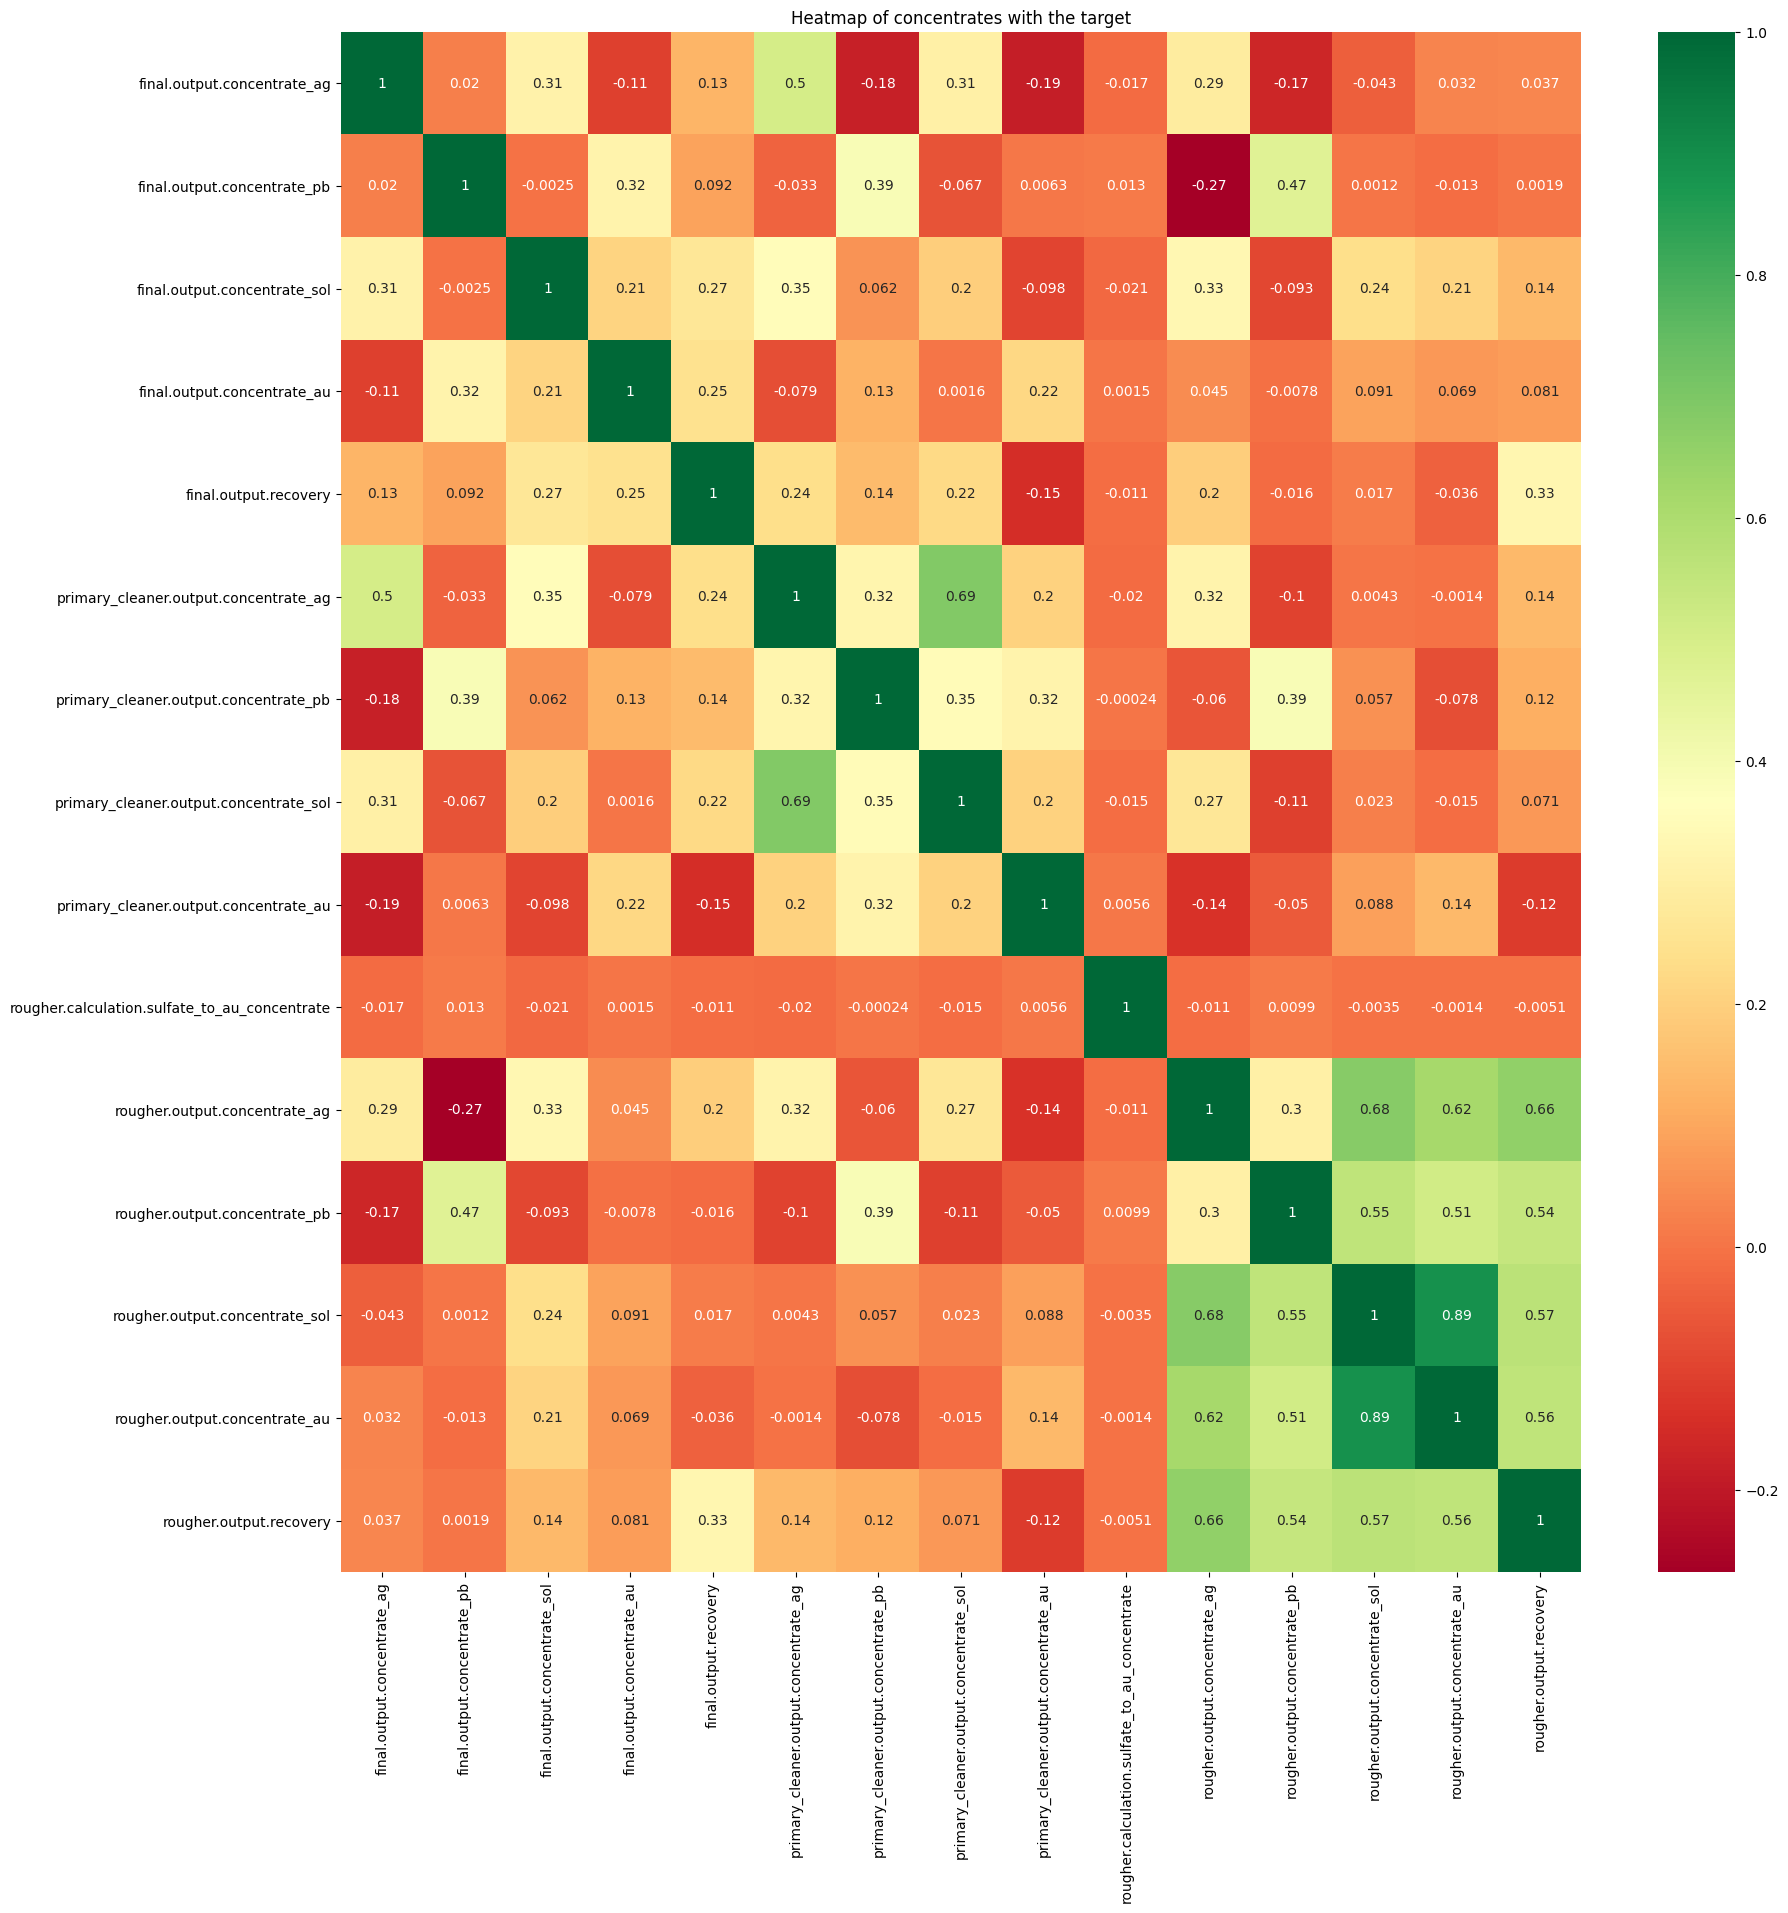

In [67]:
plot_heatmaps(train_df, 'concentrate', title='Heatmap of concentrates with the target', figsize=(7, 7))

The rougher.output.concentrate metal features have a modertately strong positive correlation with rougher.output.recovery target. However, the same can't be said for the final.output.concentrate meatal features with final.output.concentrate target.

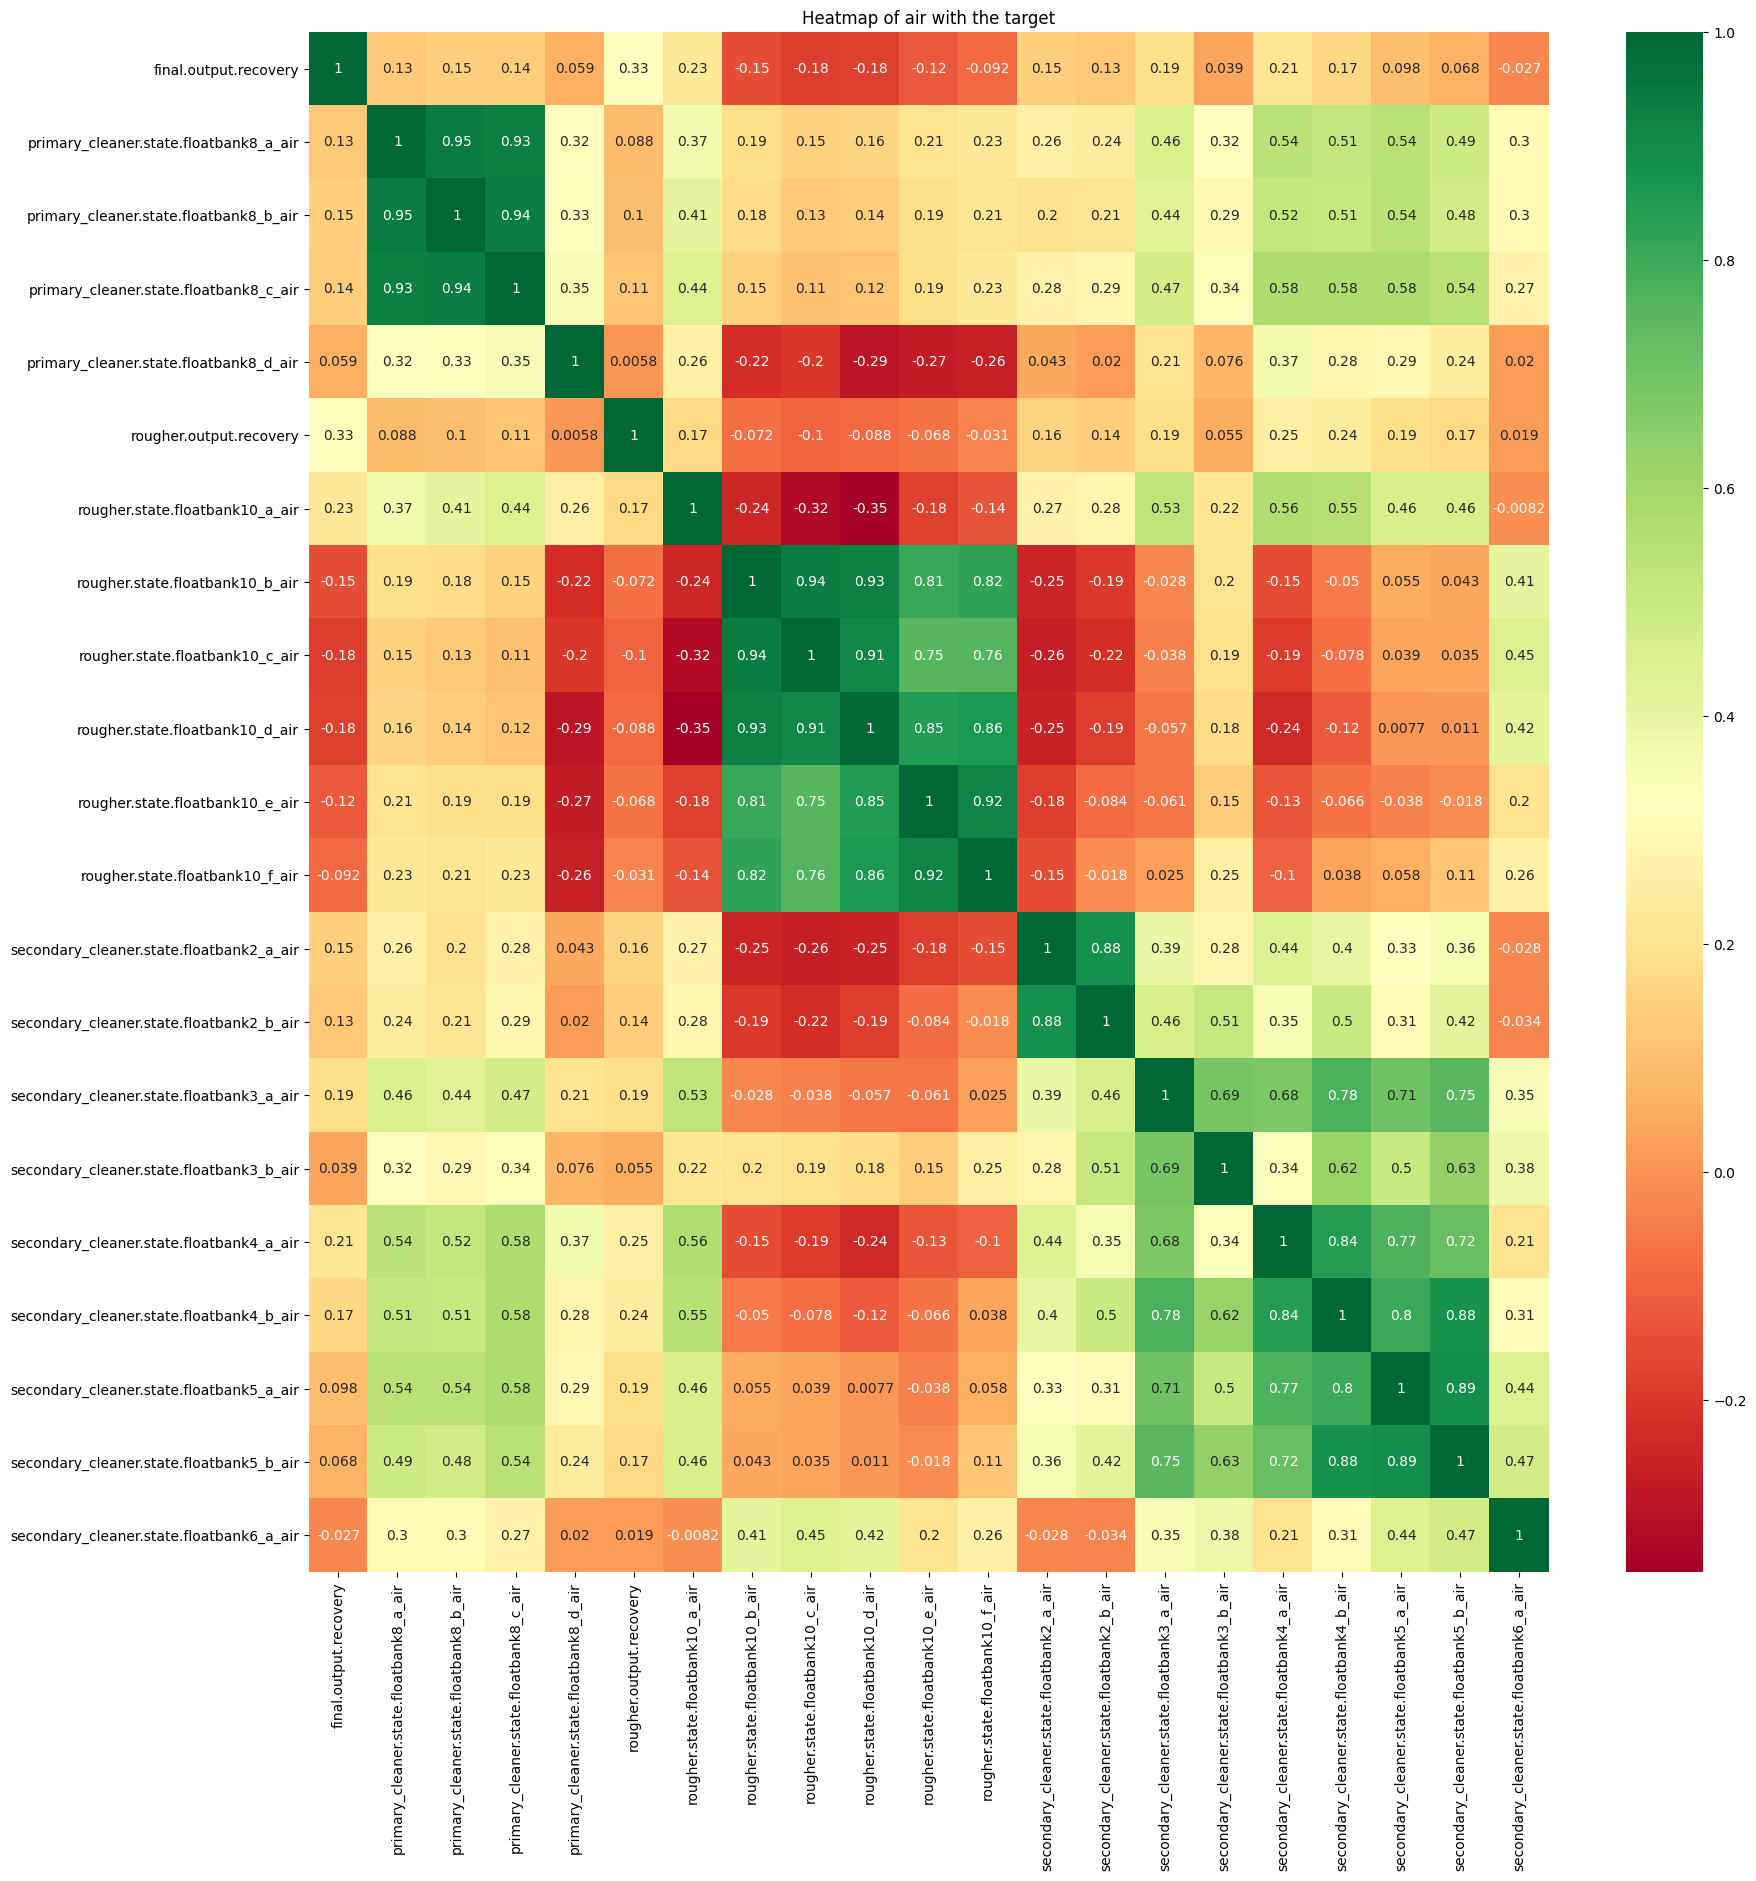

In [68]:
plot_heatmaps(train_df, 'air', title='Heatmap of air with the target', figsize=(7, 7))

The heatmap for primary_cleaner.state.floatbanks shows a very strong positive correlation with other floatbanks, which signifies a collinearity. 

The rougher.state.floatbanks abdsecondary_cleaner.state.floatbanks have a very strong positive correlation and moderately strong positive correlation with their respective floatbanks.

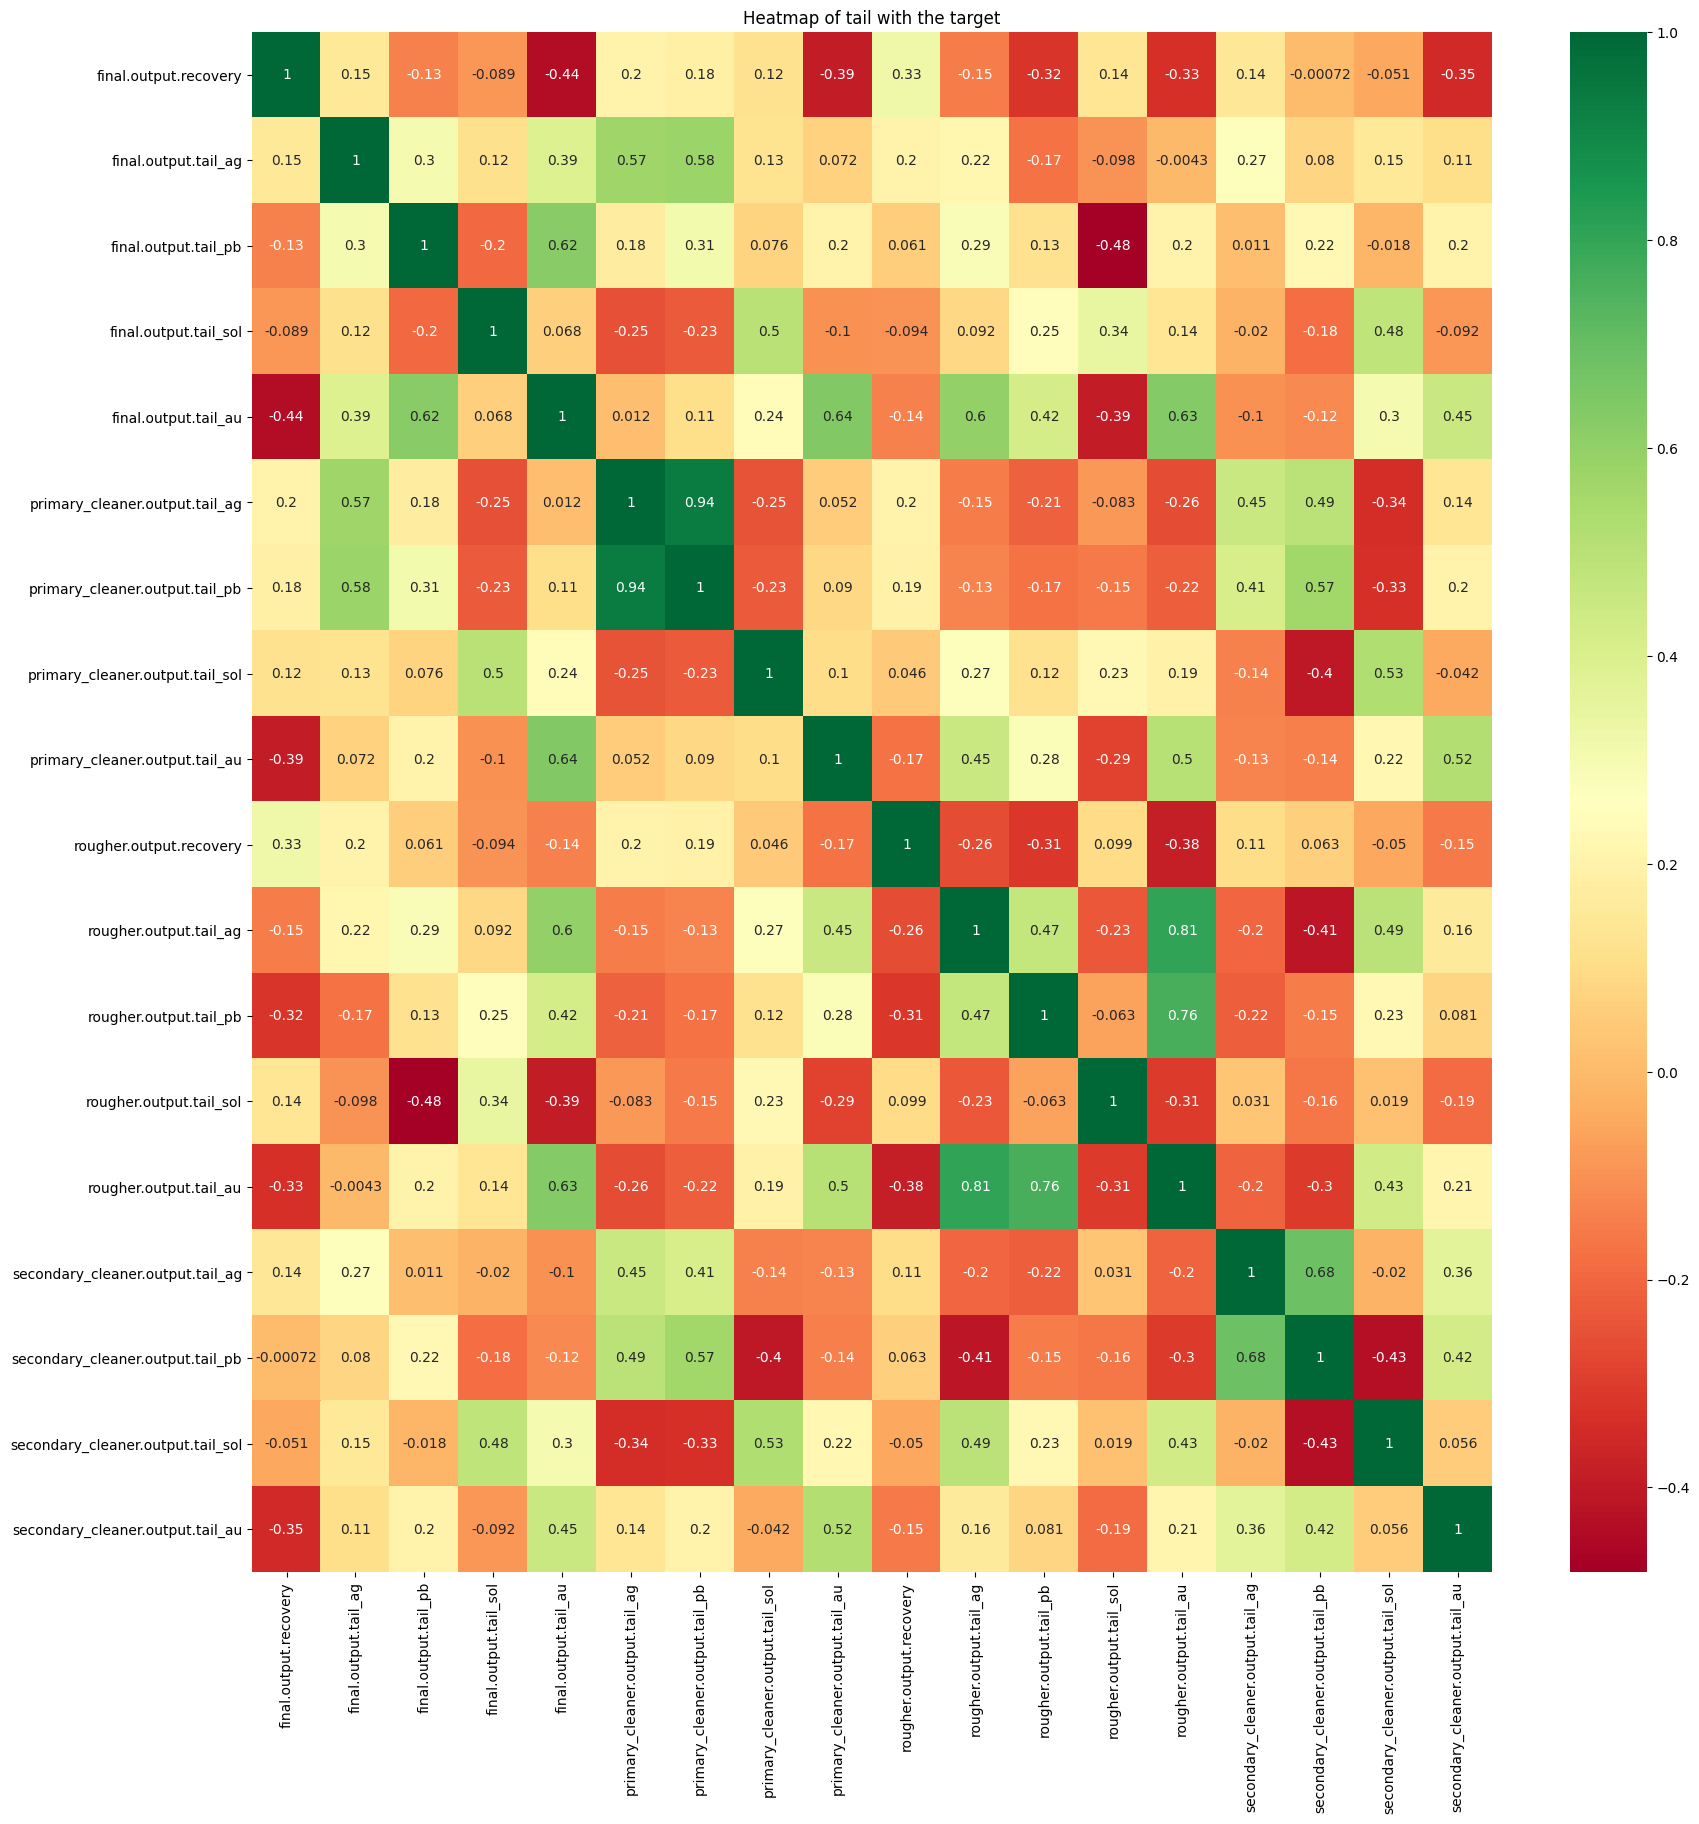

In [69]:
plot_heatmaps(train_df, 'tail', title='Heatmap of tail with the target', figsize=(7, 7))

The heatmap for the tail outputs shows a strong positive correlation between primary_cleaner.output.tail_ag and primary_cleaner.output.tail_pb. 

There is a strong positive correlation between rougher.output.tail_ag and rougher.output.tail_au, and rougher.output.tail_pb and rougher.output.tail_au. All this implies that there is a lot of redundant features.

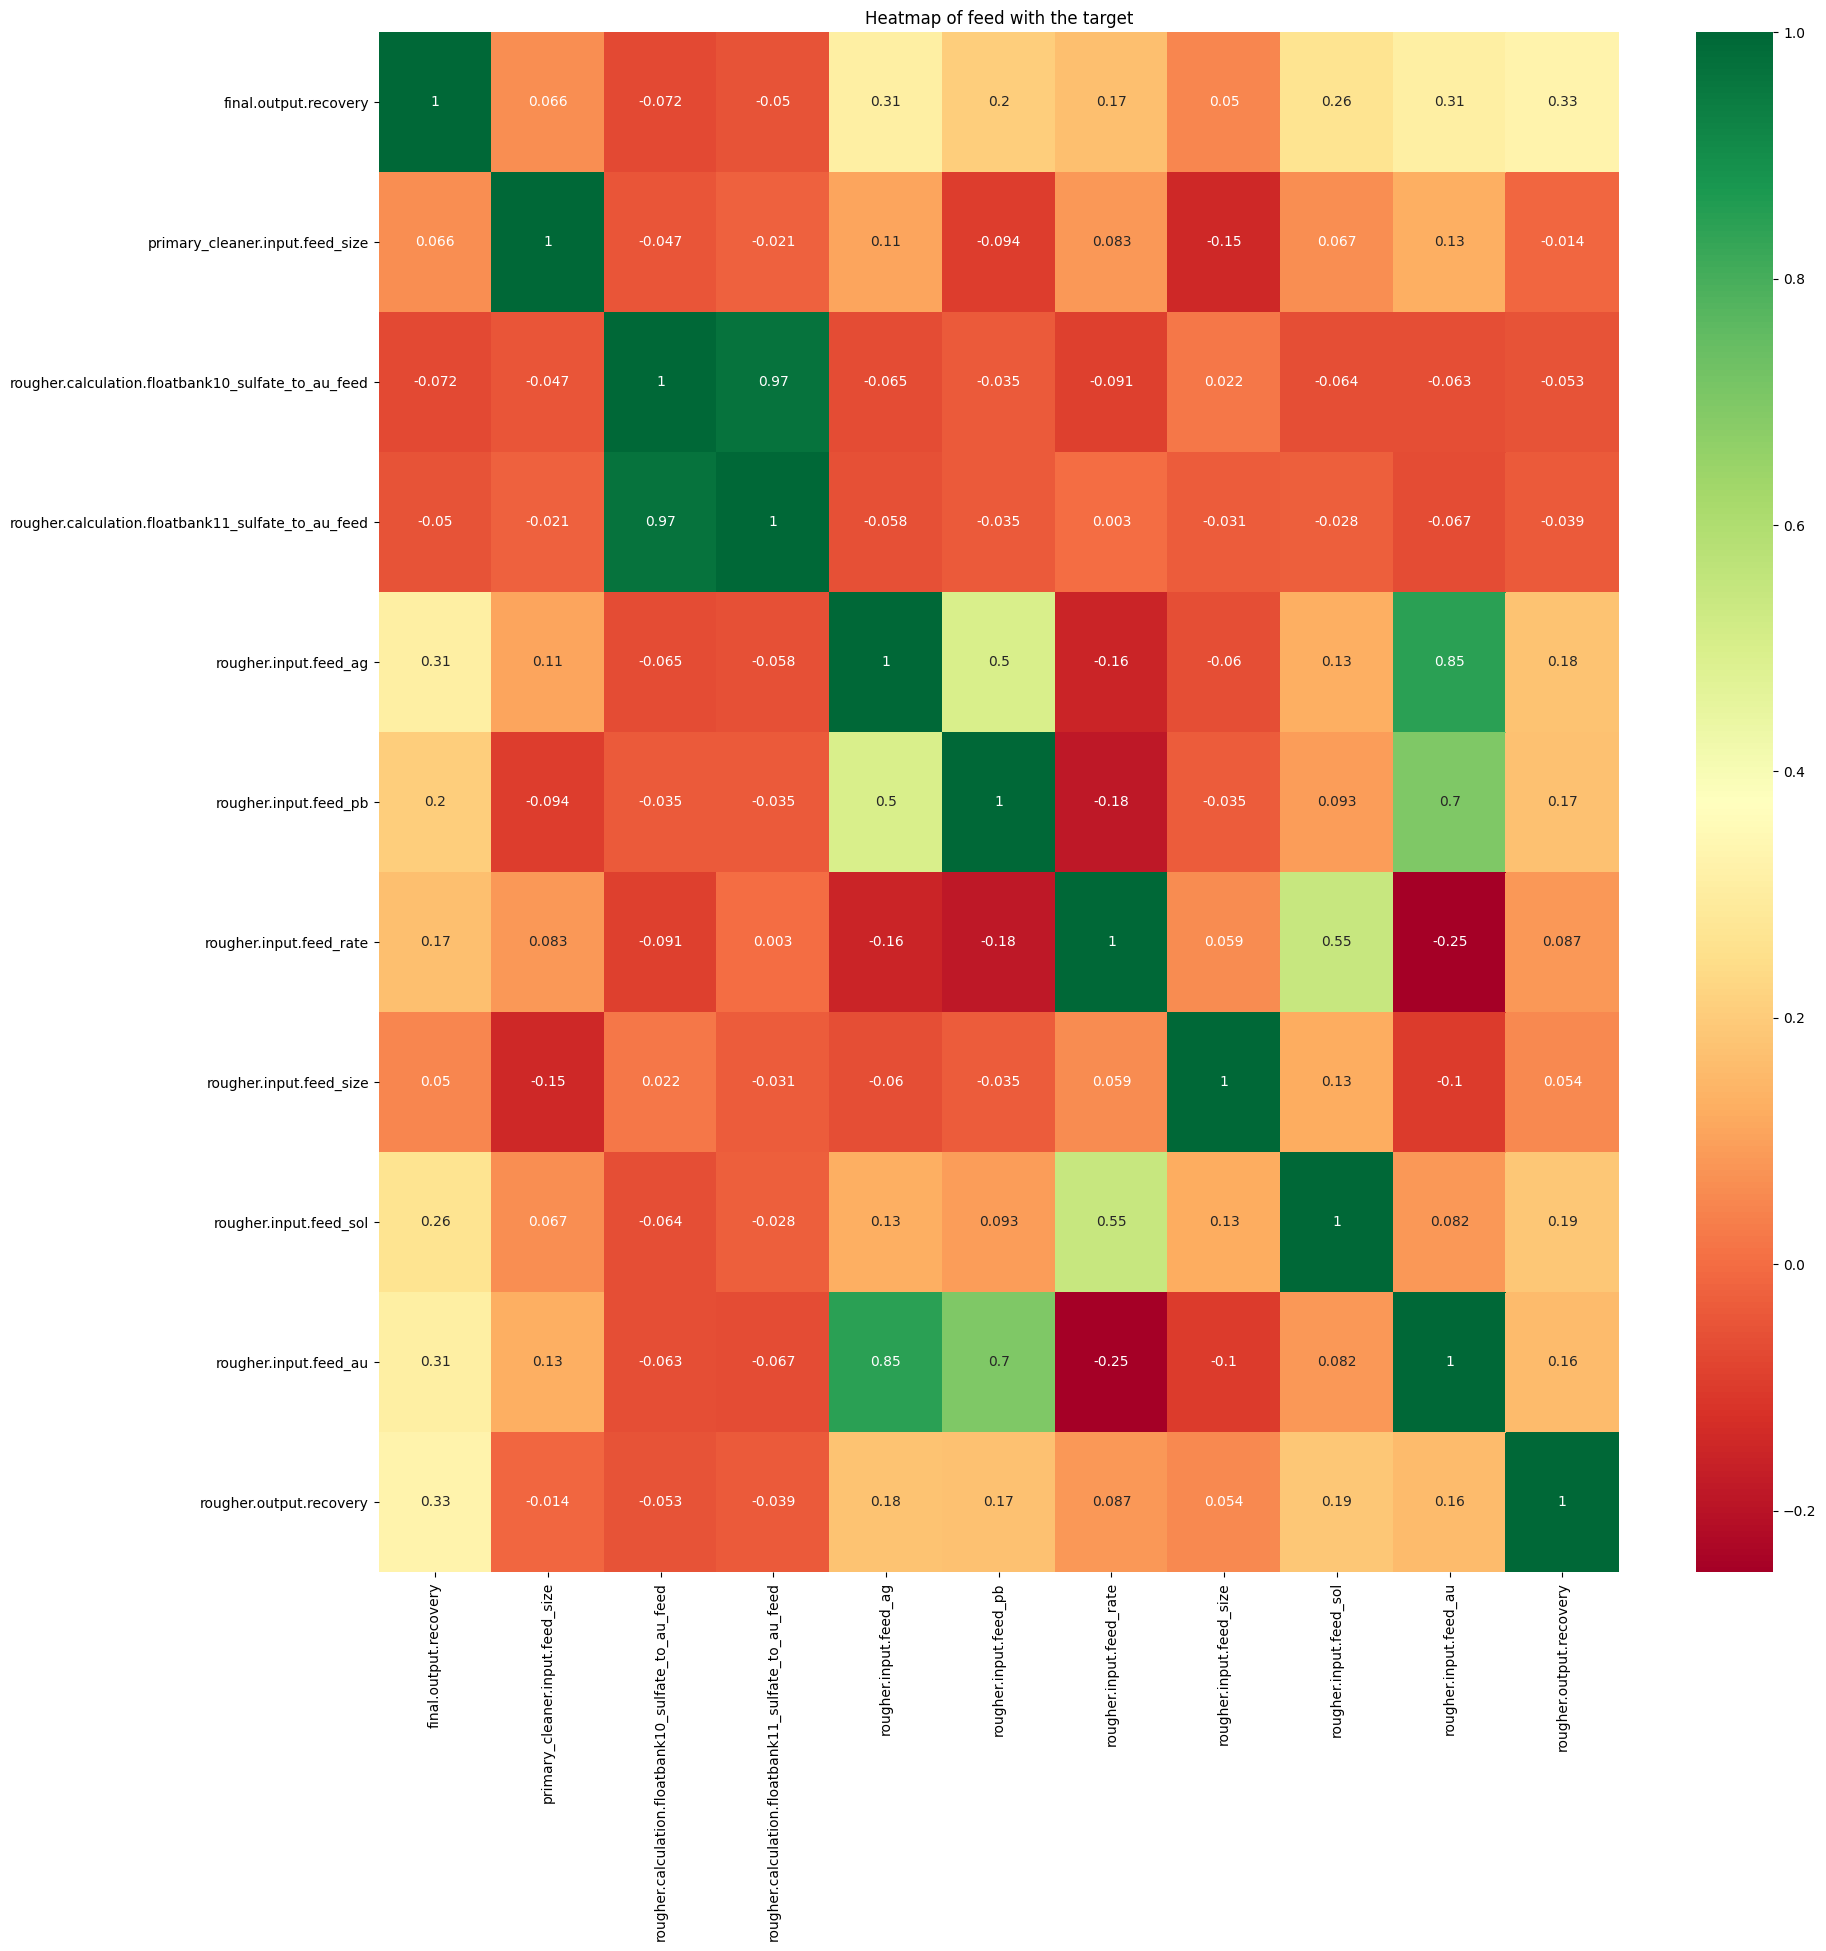

In [70]:
plot_heatmaps(train_df, 'feed', title='Heatmap of feed with the target', figsize=(7, 7))

The heatmap for feed shows a strong positive correlation between the feed for Silver and Gold, and for Lead and Gold.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good analysis!
</div>

# Build Model

In [71]:
def sMAPE(target, predictions):
    eps = 1e-6
    return 100 * np.mean(np.abs(target - predictions) / (np.abs(target) + np.maximum(np.abs(predictions), eps))/2)

In [72]:
def final_sMAPE(target, predictions):
    return 0.25 * sMAPE(target[:, 0], predictions[:, 0]) + 0.75 * sMAPE(target[:, 1], predictions[:, 1])

In [73]:
corr_matrix = train_df.corr()
res = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

/tmp/ipykernel_32/3420203934.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))


In [74]:
# Identify redundant features
cols_to_train = set()
for index, value in res.items():
    if ('recovery' not in index[0] and 'recovery' not in index[1]) and (value > 0.90 or value < -0.9):
        cols_to_train.add(index[0])
    if ('recovery' not in index[0] and 'recovery' not in index[1]) and ((0.8 <= value < 0.9) or (-0.8 <= value < -0.9)):
        cols_to_train.add(index[0])
    if ('recovery' not in index[0] and 'recovery' not in index[1]) and ((0.7 <= value < 0.8) or (-0.7 <= value < -0.8)):
        cols_to_train.add(index[0])
    if ('recovery' not in index[0] and 'recovery' not in index[1]) and ((0.6 <= value < 0.7) or (-0.6 <= value < -0.7)):
        cols_to_train.add(index[0])
    if ('recovery' not in index[0] and 'recovery' not in index[1]) and ((0.5 <= value < 0.6) or (-0.5 <= value < -0.6)):
        cols_to_train.add(index[0])

In [75]:
len(cols_to_train)

56

In [76]:
def rolling_mean_feature(df, on='date', freq='24H', feature=None):
    """
    Compute rolling mean on a 24 hour window
    """
    return df.rolling(freq, on=on)[feature].mean()

In [77]:
train_df['rougher.output.concentrate_au_rolling_mean'] = (rolling_mean_feature(train_df, on='date', freq='24H', feature='rougher.output.concentrate_au'))

In [78]:
train_df['final.output.concentrate_au_rolling_mean'] = (rolling_mean_feature(train_df, on='date', freq='24H', feature='final.output.concentrate_au'))

In [79]:
test_df['rougher.output.concentrate_au_rolling_mean'] = (rolling_mean_feature(test_df, on='date', freq='24H', feature='rougher.output.concentrate_au'))

In [80]:
test_df['final.output.concentrate_au_rolling_mean'] = (rolling_mean_feature(test_df, on='date', freq='24H', feature='final.output.concentrate_au'))

In [81]:
addl_fields = ['rougher.output.concentrate_au_rolling_mean', 'final.output.concentrate_au_rolling_mean']

for col in addl_fields:
    cols_to_train.add(col)

In [82]:
targets = [ 'rougher.output.recovery', 'final.output.recovery']

In [83]:
train_X , test_X, train_y, test_y = (train_df[cols_to_train].copy(), test_df[cols_to_train].copy(), train_df[targets], test_df[targets])

In [84]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((14148, 58), (5856, 58), (14148, 2), (5856, 2))

In [85]:
# scorer to be used in cross_val_score()
scorer = make_scorer(final_sMAPE)

In [93]:
def build_model(model, train_X, train_y, hyperparameters={}, scoring=None, cv=5, is_lr=False):
    
    np.random.seed(42)
    smape = []
    param = {}
    best_smape = 0
    best_model = None
    best_params = None
    num_test = 0
    if len(hyperparameters) == 0:
        num_test = 1
    else:
        num_test = np.arange(1, len(list(hyperparameters.values())[0])+1)
    if is_lr:
        scores = cross_val_score(model, train_X, train_y.values, scoring=scorer, cv=cv)
        smape.append(np.mean(scores))
    else:
        for val in list(hyperparameters.values())[0]:
            arg = list(hyperparameters.keys())[0]
            param = {arg: val}
            mod = model(**param, random_state=42)
            scores = cross_val_score(mod, train_X, train_y.values, scoring=scorer, cv=cv)
            smape.append(np.mean(scores))

            if np.mean(scores) > best_smape:
                best_smape = np.mean(scores)
                best_model = model
                
    return best_model, pd.DataFrame({'num_tests': num_test, 'smape_score': smape}) 

In [94]:
best_model, results = build_model(LinearRegression(), train_X, train_y, scoring=scorer, cv=5, is_lr=True)

In [97]:
print('Best Cross Val Score for LinearRegression is {}'.format(results['smape_score'][0]))

Best Cross Val Score for LinearRegression is 1.6890964189085884


In [3]:
# Finding best params
# commented because it took about 30 minutes

In [99]:
# hyperparameters = {'n_estimators': np.arange(50, 150, 20)}

# best_model, best_params, results = build_model(RandomForestRegressor, train_X, train_y, hyperparameters=hyperparameters, scoring=scorer, cv=5)

In [103]:
# best_model

RandomForestRegressor(n_estimators=70, random_state=42)

In [101]:
# results['smape_score'][0]

1.0391135221666445

In [108]:
%%time
np.random.seed(42)
best_model = RandomForestRegressor(n_estimators=70, random_state=42)
scores_rf = cross_val_score(best_model.fit(train_X, train_y.values), train_X, train_y.values, scoring=scorer, cv=5)
print('Mean Cross Val score for RandomForestRegression is {}'.format(np.mean(scores_rf)))

Mean Cross Val score for RandomForestRegression is 1.0333027452838635
CPU times: user 6min 6s, sys: 360 ms, total: 6min 7s
Wall time: 6min 7s


In [110]:
results['smape_score'][0]

1.0391135221666445

In [104]:
pd.DataFrame({'fields': train_X.columns, 'importances': best_model.feature_importances_}).sort_values('importances', ascending=False)[:5]

,fields,importances
3,rougher.output.concentrate_ag,0.208311
46,rougher.output.concentrate_pb,0.165283
49,final.output.tail_au,0.139185
12,rougher.output.concentrate_sol,0.095126
18,rougher.input.feed_au,0.090832


In [105]:
%%time
preds = best_model.predict(test_X)
test_smape = final_sMAPE(test_y.values, preds)
print('sMAPE on the test set is', test_smape)

sMAPE on the test set is 2.89092789762263
CPU times: user 81.3 ms, sys: 5 µs, total: 81.3 ms
Wall time: 99.7 ms


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

# Summary

he missing values in the train and test sets were filled using interpolation.

There are several days where the target variables, especially, rougher.output.recovery which has 0 values because the related concentrates at that stage had 0 values.

These anomalies could be attributed due to a couple of reasons such as Production issues and Instrument failures.

The change in mean concentration of Gold increases with every stage of the purification process, but the opposite happens for Silver, which is expected as we are interested in improving the share of Gold in the final concentrate.

The distribution of input size of concentrates between the train and test sets is amost similar which assures us that predictions aren't going to be way off.

Correlation matrix helped us identify several collinear features which could be dropped as they wouldn't have improved the signal to noise ratio.

The best model between LinearRegression and RandomForestRegression after applying cross validation with 5 folds is RandomForestRegression; the mean sMAPE during training is 1.039.

The sMAPE on the test set is 2.891.

By addressing the anomalies in the rougher.output.concentrate and in the final.output.concentrate substances, we could improve the performance of the model by lowering the sMAPE, which would help the company make better predictions of rougher.concentrate.recovery and final.output.recovery.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great final conclusion!
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Thank you for sending your project. You've done a really good job on it!
    
Especially impressed:

- very deep detailed conclusions
    
- good graphs
    
- high code level

- good project structure
    
    
Thank you for in-depth analysis and logical conclusions!
    
I'm glad to say that your project has been accepted. Keep up the good work and good luck on the next sprint!
</div>